# Predicció del preu d'un smartphone
<img src="https://www.danza.es/multimedia/biografias/toni-mira/fotografia_mini" width="124">
<img src="https://www.uab.cat/ca/bioquimica/img/imatge-grup-recerca/img_barnadas.jpg" width="124">
<img src="https://media.licdn.com/dms/image/C4D03AQEhvo9I49TcIw/profile-displayphoto-shrink_200_200/0/1516273408037?e=2147483647&v=beta&t=Gt5DQskgOdcVvVswAI4olZv4fjhuMx6igOL0Lck8tx8" width="150">
<img src="https://fad.cat/editor/wp-content/uploads/2020/09/Ignasi-Bonet-2019-1024x1024.jpg" width="150">
<img src = "https://media.licdn.com/dms/image/C5603AQEf4IaqIC9TJQ/profile-displayphoto-shrink_200_200/0/1517268969147?e=2147483647&v=beta&t=6xT7f4ajDQ1Af8ZzDIOh5Yidl0bd-Cm7vFCLaO17hms" width ="150"> 
<img src = "https://media.licdn.com/dms/image/C4D03AQGwIEMiD2pifQ/profile-displayphoto-shrink_200_200/0/1605860256354?e=2147483647&v=beta&t=HFH9emP2gpIyEAncmUI7ItYCctUKWwA9qzkNjwz3l_k" width ="150">
<img src = "https://pbs.twimg.com/profile_images/990569948438245376/6eV8oIww_400x400.jpg" width ="150">
<img src = "https://media.licdn.com/dms/image/C5603AQGAzhZMkjY0uQ/profile-displayphoto-shrink_800_800/0/1517590049294?e=2147483647&v=beta&t=OiR5bub-XQmtg271GODafLkX38WbMfC6PYChbITqYQU" width ="150">
<img src = "https://unio.coop/wp-content/uploads/2023/04/francesc-baiges.jpg" width ="150">
<img src = "https://i1.rgstatic.net/ii/profile.image/380426016313345-1467712038241_Q512/Pere-Hidalgo-Santos.jpg" width ="150">
<img src = "https://i.ytimg.com/vi/tyPo1NfPmOY/maxresdefault.jpg" width ="270">
<img src = "" width ="150">


In [143]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [144]:
path_file = os.getcwd() + "/smartphone_data.csv"
data = pd.read_csv(path_file)
data.head(5)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [145]:
data.isna().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

# Preprocessament
Fem `drop` de fast charging i de model ja que fast charging no aporta informació extra respecte a fast_charging_available i model té un nom únic per a cada mòbil.

In [147]:
data.drop(columns = ["fast_charging"], inplace = True)
data.drop(columns = ["model"], inplace = True)

## Matriu de correlació de les nostres variables numèriques sense preprocessar

<Axes: >

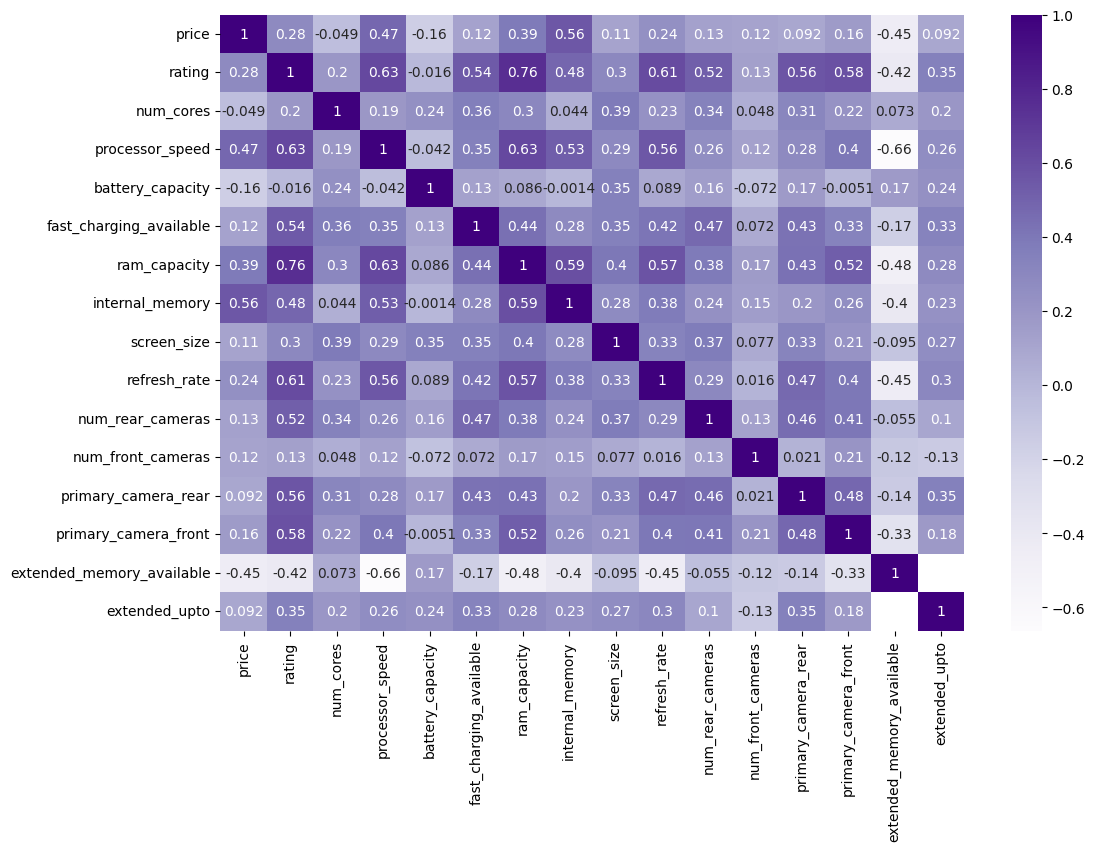

In [148]:
data_num = data.select_dtypes(include = [np.number])
# correlation matrix
cor = data_num.corr()
# plot it
plt.figure(figsize = (12, 8))
sns.heatmap(cor, annot = True, cmap = plt.cm.Purples)


## Visualitzem les distribucions de les nostres variables numèriques

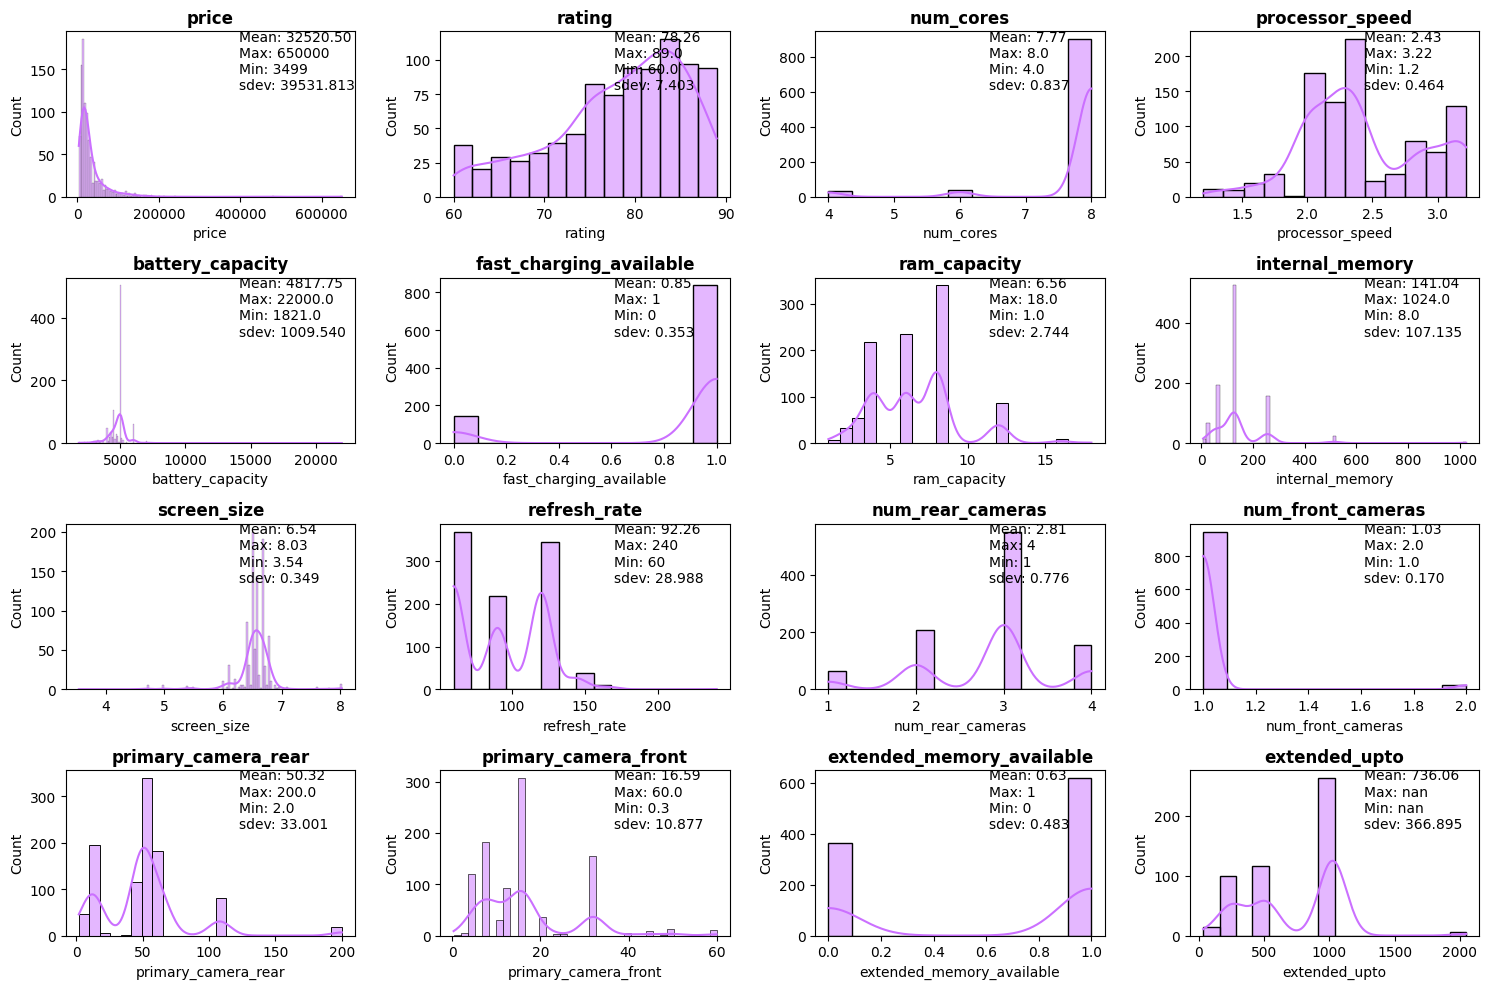

In [149]:
numericals = data_num.columns

fig, axs = plt.subplots(4, 4, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes

for i, column in enumerate(numericals):
    column_treated = pd.to_numeric(data[column], errors='coerce')
    mitjana = column_treated.mean()
    sns.histplot(data_num[column], kde=True, ax=axs[i], color="#cb70ff")
    axs[i].set_title(column, fontweight="bold")
    axs[i].text(0.6, 0.65, f"Mean: {mitjana:.2f}\nMax: {max(data[column])} \nMin: {min(data[column])} \nsdev: {column_treated.std():.3f}", transform=axs[i].transAxes)  # Use transAxes to position text

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

## Fem els barplots de les nostres variables categòriques

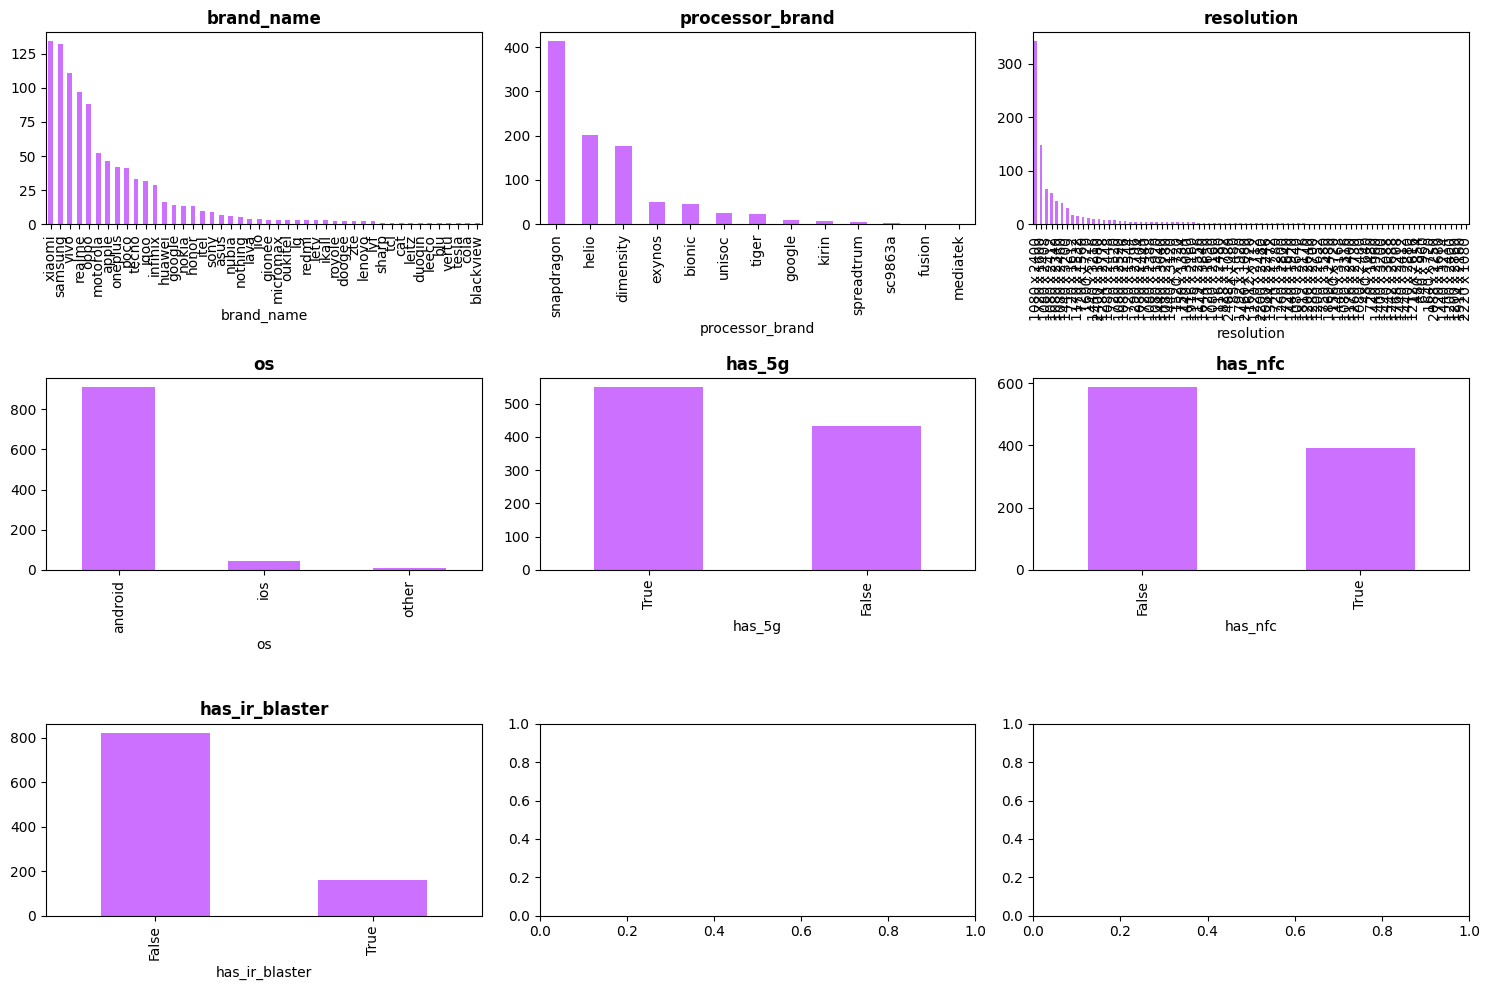

In [150]:
categoricals = data.select_dtypes(include=[object]).columns 
categoricals = pd.Index(categoricals)
categoricals = categoricals.append(pd.Index(["has_5g","has_nfc","has_ir_blaster"]))

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes

for i, column in enumerate(categoricals):
    data[column].value_counts().plot(kind='bar', ax=axs[i], color = "#cb70ff")
    axs[i].set_title(column, fontweight="bold")

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [151]:
# sns.pairplot(data[numericals], diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 1}})

## Tractem les variables que puguin presentar problemes

### Tractament de la variable "processor_brand"

In [152]:
data2 = data.copy()

count = data2['processor_brand'].value_counts()
mask = data2['processor_brand'].isin(count[count < 60].index)
data2.loc[mask, 'processor_brand'] = 'others'

In [153]:
print(data2['processor_brand'].value_counts())

processor_brand
snapdragon    413
helio         201
dimensity     177
others        169
Name: count, dtype: int64


### Tractament de la variable "resolution"

In [154]:
def calculate_pixels(resolution):
    width, height = resolution.split('x')
    return int(width) * int(height)

data2['resolution'] = data2['resolution'].apply(calculate_pixels)
data2['resolution'] = pd.to_numeric(data2['resolution'])
data2 = data2.rename(columns={'resolution': 'number_pixels'})

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   price                      980 non-null    int64  
 2   rating                     879 non-null    float64
 3   has_5g                     980 non-null    bool   
 4   has_nfc                    980 non-null    bool   
 5   has_ir_blaster             980 non-null    bool   
 6   processor_brand            960 non-null    object 
 7   num_cores                  974 non-null    float64
 8   processor_speed            938 non-null    float64
 9   battery_capacity           969 non-null    float64
 10  fast_charging_available    980 non-null    int64  
 11  ram_capacity               980 non-null    float64
 12  internal_memory            980 non-null    float64
 13  screen_size                980 non-null    float64

### Tractament de la variable "brand_name"

In [155]:
print(data2['brand_name'].value_counts())

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
gionee         3
micromax       3
oukitel        3
lg             3
redmi          3
letv           3
ikall          3
royole         2
doogee         2
zte            2
lenovo         2
lyf            2
sharp          1
tcl            1
cat            1
leitz          1
duoqin         1
leeco          1
blu            1
vertu          1
tesla          1
cola           1
blackview      1
Name: count, dtype: int64


In [156]:
count = data2['brand_name'].value_counts()
mask = data2['brand_name'].isin(count[count < 40].index)
data2.loc[mask, 'brand_name'] = 'others'
print(data2['brand_name'].value_counts())

brand_name
others      237
xiaomi      134
samsung     132
vivo        111
realme       97
oppo         88
motorola     52
apple        46
oneplus      42
poco         41
Name: count, dtype: int64


### Convertim a categoriques les següents variables
"""refresh_rate,num_rear_cameras, num_front_cameras (bin),extended_memory_available,fast_charging_available (bin), num_cores"""


In [157]:
to_categorical = ["refresh_rate", "num_rear_cameras","num_front_cameras","extended_memory_available","fast_charging_available","num_cores"]
for col in to_categorical:
    data2[col] = data2[col].astype('category')
data2.head(10)


,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,screen_size,refresh_rate,number_pixels,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,...,6.70,120,4631040,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,...,6.59,120,2604960,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,16499,75.0,True,False,False,others,8.0,2.40,5000.0,...,6.60,90,2600640,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,...,6.55,120,2592000,3,1.0,android,50.0,16.0,1,1024.0
4,realme,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,...,6.70,120,2604960,3,1.0,android,108.0,16.0,0,NaN
5,samsung,16999,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,...,6.60,120,2600640,3,1.0,android,50.0,8.0,1,1024.0
6,apple,65999,81.0,True,True,False,others,6.0,3.22,3279.0,...,6.10,60,2962440,2,1.0,ios,12.0,12.0,0,NaN
7,xiaomi,29999,86.0,True,False,True,dimensity,8.0,2.60,4980.0,...,6.67,120,2592000,3,1.0,android,200.0,16.0,0,NaN
8,others,26749,85.0,True,True,False,snapdragon,8.0,2.50,4500.0,...,6.55,120,2592000,2,1.0,android,50.0,16.0,0,NaN
9,oneplus,28999,84.0,True,True,False,dimensity,8.0,3.00,4500.0,...,6.43,90,2592000,3,1.0,android,50.0,32.0,0,NaN


## Tractament dels outliers

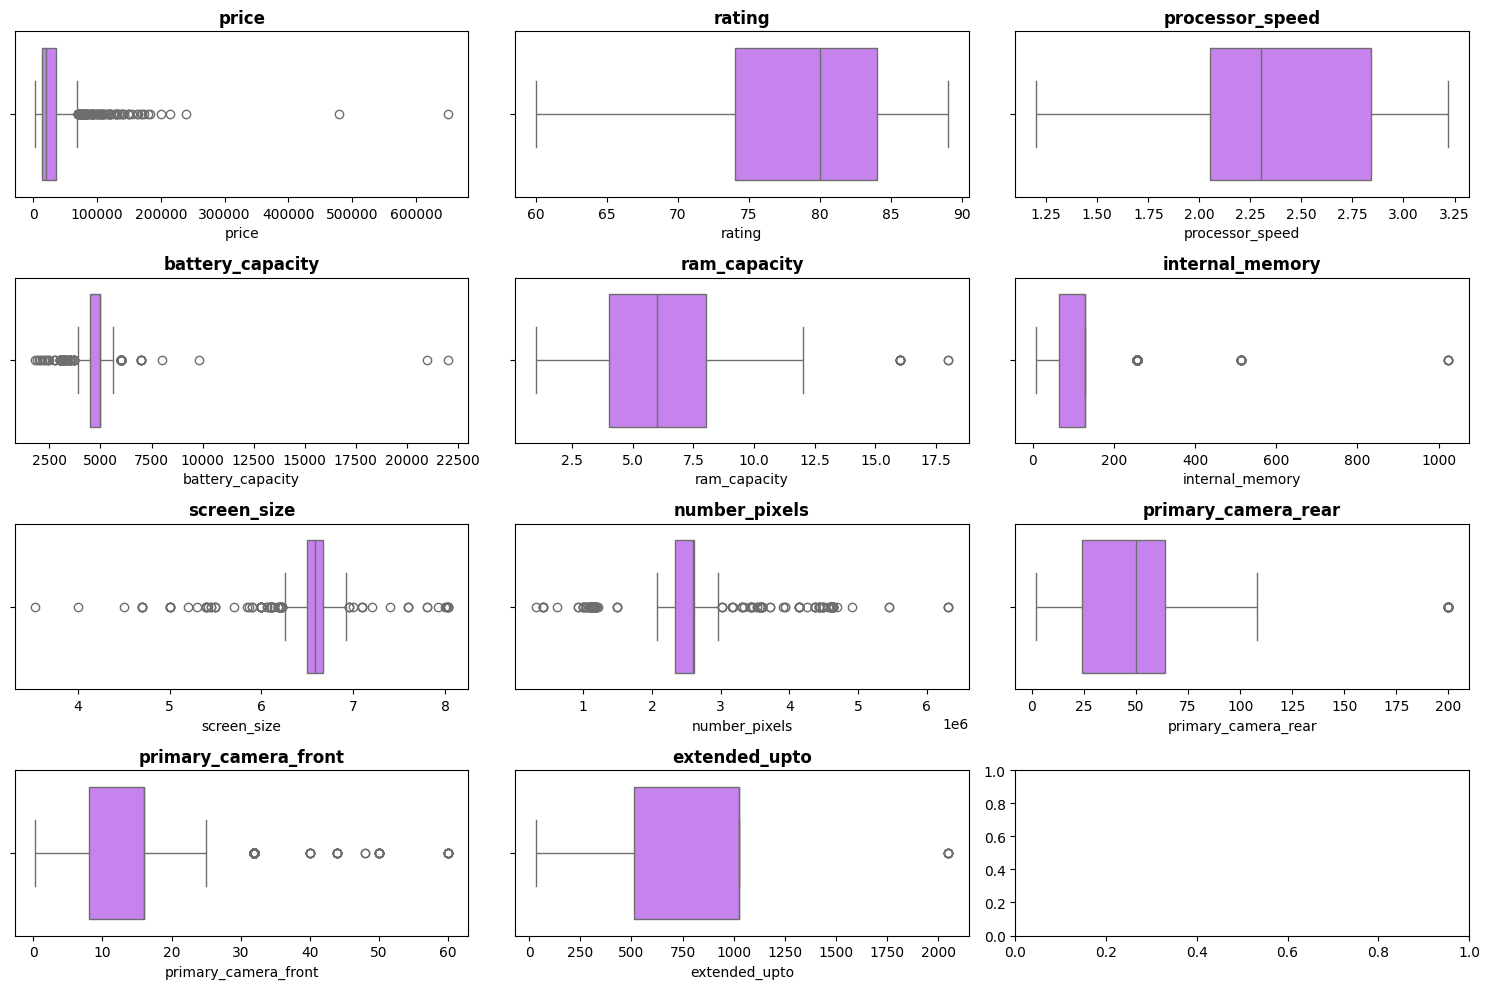

In [158]:
fig, axs = plt.subplots(4, 3, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes
numericals = data2.select_dtypes(include=[np.number]).columns
for i, column in enumerate(numericals):
    column_treated = pd.to_numeric(data2[column], errors='coerce').dropna()
    sns.boxplot(x=column_treated, ax=axs[i], color = "#cb70ff")
    axs[i].set_title(column, fontweight="bold")

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

### Observem aquelles variables que presenten els outliers més extrems

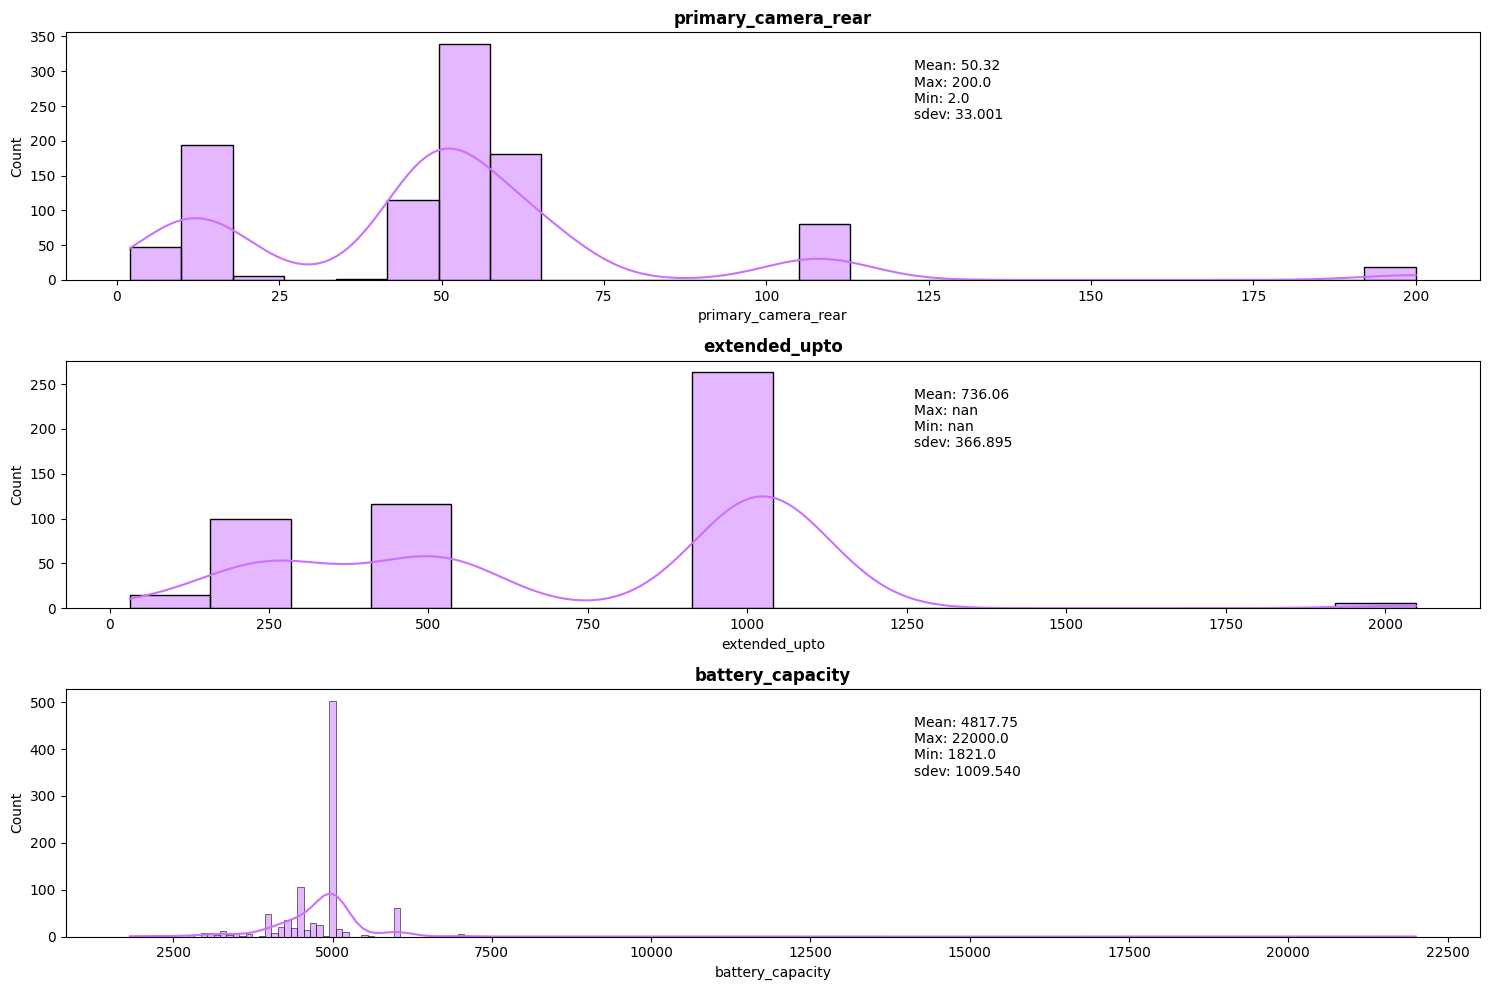

In [159]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10))  # Adjust grid size and figure size as needed
axs = axs.ravel()  # Flatten the array of axes
selected = ["primary_camera_rear","extended_upto","battery_capacity"]
for i, column in enumerate(selected):
    column_treated = pd.to_numeric(data2[column], errors='coerce')
    mitjana = column_treated.mean()
    sns.histplot(data_num[column], kde=True, ax=axs[i], color="#cb70ff")
    axs[i].set_title(column, fontweight="bold")
    axs[i].text(0.6, 0.65, f"Mean: {mitjana:.2f}\nMax: {max(data2[column])} \nMin: {min(data2[column])} \nsdev: {column_treated.std():.3f}", transform=axs[i].transAxes)  # Use transAxes to position text

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

### PCA de les nostres dades per trobar outliers

(452, 3)
(980, 23)
(980, 23)
Number of outliers: 23


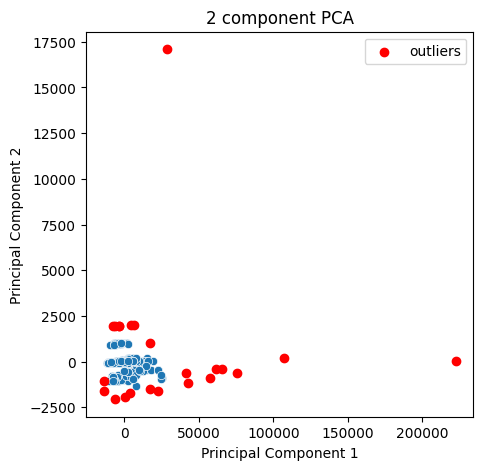

In [160]:
pca = PCA(n_components=2)
pca.fit(data_num.dropna())
data_pca = pca.transform(data_num.dropna())
data_pca = pd.DataFrame(data_pca, columns=['pca1', 'pca2'])

clf = IsolationForest(random_state=0,contamination=0.05)
clf.fit(data_pca)
outliers = clf.predict(data_pca)
data_pca['outliers'] = outliers

print(data_pca.shape)
print(data2.shape)
# Get the indices of the outliers
outlier_indices = data_pca[data_pca['outliers'] == -1].index

# Drop the 
print(data2.shape)

# plot the data
plt.figure(figsize=(5, 5))
sns.scatterplot(x='pca1', y='pca2', data=data_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
# plot the outliers
outliers = data_pca[data_pca['outliers'] == -1]
plt.scatter(outliers['pca1'], outliers['pca2'], color='red', label='outliers')
# print the number of outliers
print(f'Number of outliers: {len(outliers)}')
plt.legend()
plt.show()


## Indentifiquem outliers amb IQR

In [161]:
# using IQR to remove outliers
Q1 = data2.select_dtypes(include=[np.number]).quantile(0.1)
Q3 = data2.select_dtypes(include=[np.number]).quantile(0.9)
IQR = Q3 - Q1
# count the number of outliers
outliers = (data2.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (data2.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))
print(outliers.sum())


price                   12
rating                   0
processor_speed          0
battery_capacity        18
ram_capacity            11
internal_memory          5
screen_size             38
number_pixels            0
primary_camera_rear     18
primary_camera_front     0
extended_upto            0
dtype: int64


In [162]:
# set the rows that contain outliers to NaN
data2[outliers.any(axis=1)] = pd.NA

C:\Users\maxmg\AppData\Local\Temp\ipykernel_17592\2787017568.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data2[outliers.any(axis=1)] = pd.NA
C:\Users\maxmg\AppData\Local\Temp\ipykernel_17592\2787017568.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data2[outliers.any(axis=1)] = pd.NA
C:\Users\maxmg\AppData\Local\Temp\ipykernel_17592\2787017568.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data2[outliers.any(axis=1)] = pd.NA


## Estudi dels missing values

<Axes: >

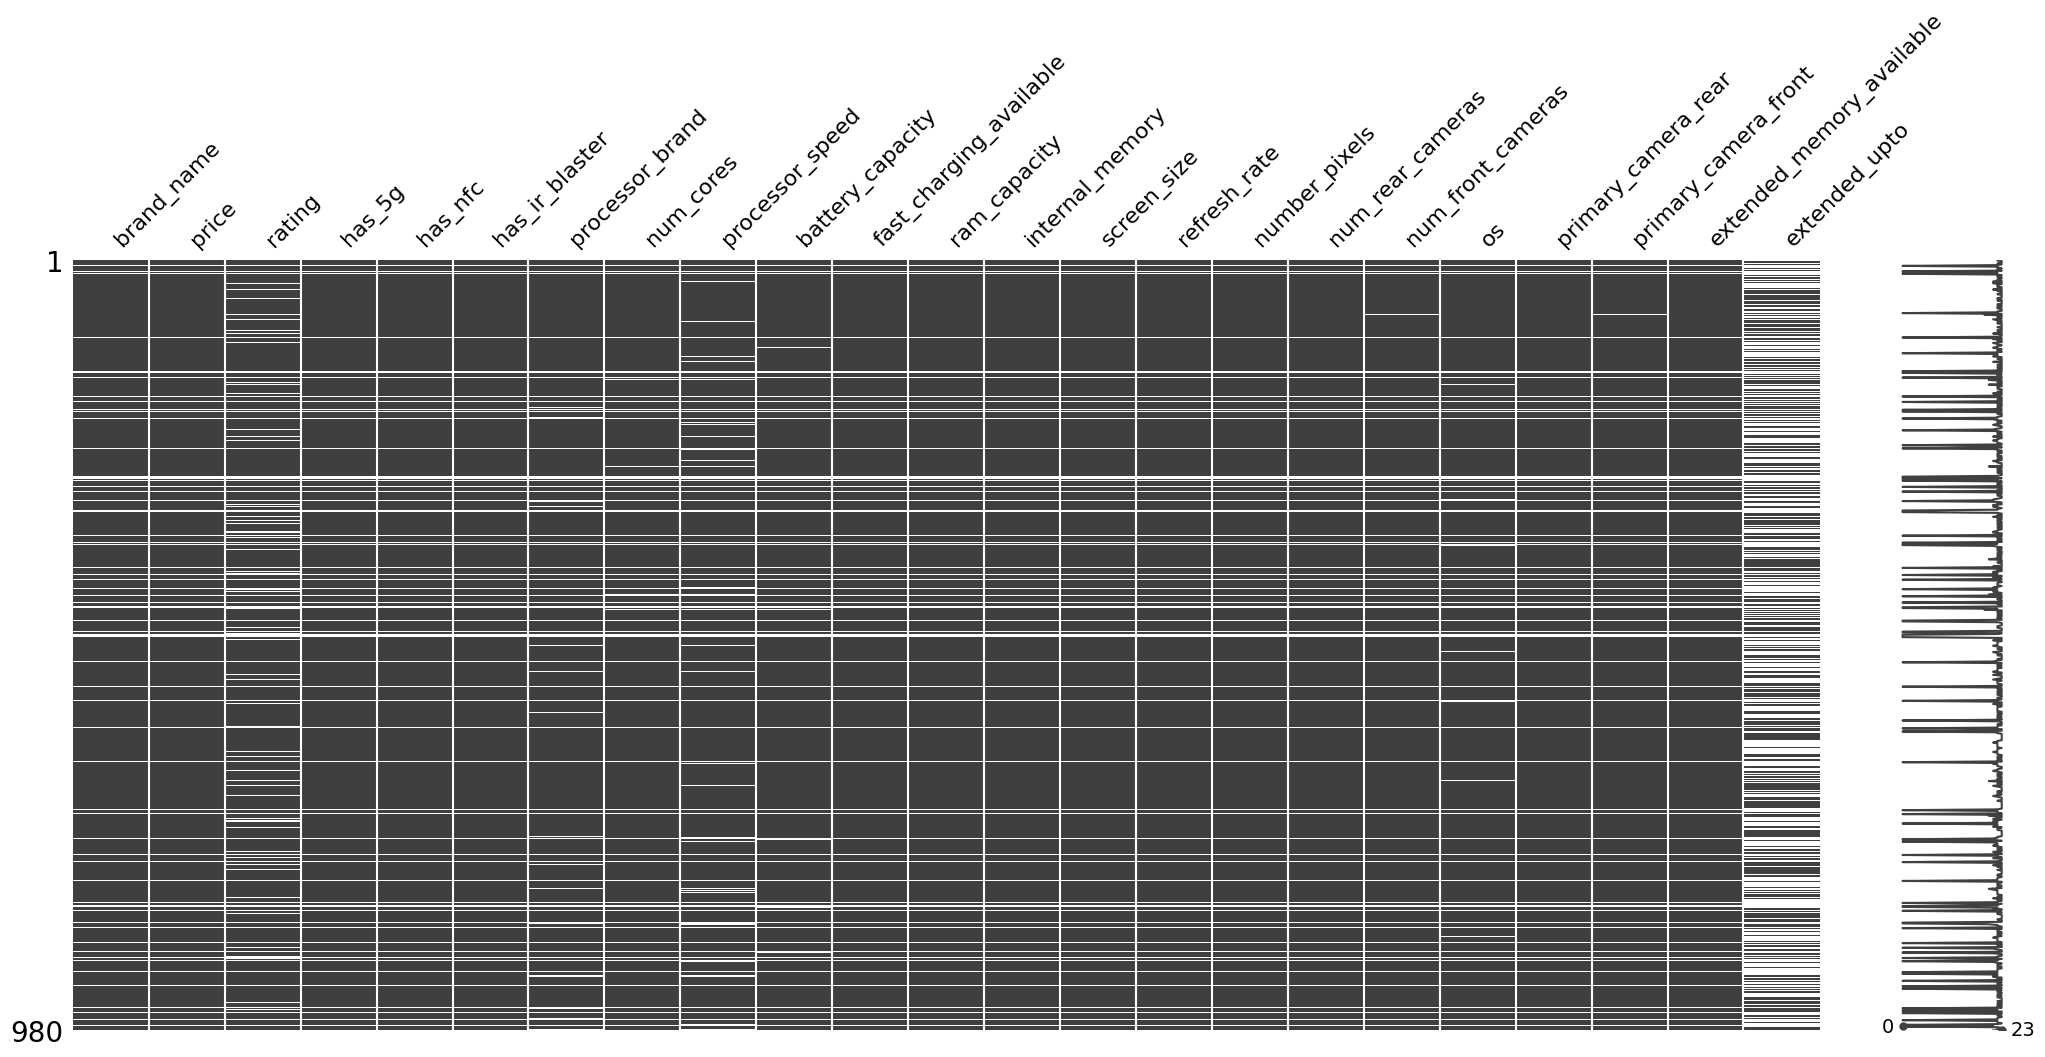

In [163]:
import missingno as msno
msno.matrix(data2)

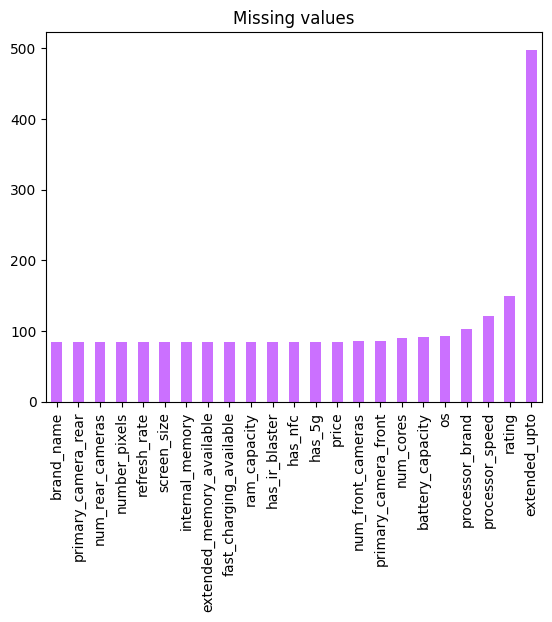

In [164]:
# plot with the missing values
missing = data2.isna().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="#cb70ff")
plt.title("Missing values")
plt.show()

In [165]:
# fem drop de extended_upto ja que te una gran quantitat de missing values
data2.drop(columns = ["extended_upto"], inplace = True)

## Convertim les variables categòriques en numèriques

In [166]:
categoricals = ['brand_name', 'processor_brand', 'os', 'has_5g',
       'has_nfc', 'has_ir_blaster']

### Categoritzant les variables

### Amb one-hot encoding

In [167]:
data3 = pd.get_dummies(data2, columns=categoricals)
data3.head(5)

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,...,processor_brand_snapdragon,os_android,os_ios,os_other,has_5g_False,has_5g_True,has_nfc_False,has_nfc_True,has_ir_blaster_False,has_ir_blaster_True
0,54999.0,89.0,8.0,3.2,5000.0,1,12.0,256.0,6.70,120,...,True,True,False,False,False,True,False,True,True,False
1,19989.0,81.0,8.0,2.2,5000.0,1,6.0,128.0,6.59,120,...,True,True,False,False,False,True,True,False,True,False
2,16499.0,75.0,8.0,2.4,5000.0,1,4.0,64.0,6.60,90,...,False,True,False,False,False,True,True,False,True,False
3,14999.0,81.0,8.0,2.2,5000.0,1,6.0,128.0,6.55,120,...,True,True,False,False,False,True,True,False,True,False
4,24999.0,82.0,8.0,2.6,5000.0,1,6.0,128.0,6.70,120,...,False,True,False,False,False,True,True,False,True,False


In [168]:
print(data3.shape)

(980, 39)


## Train-Test split

In [169]:
y = data3["price"]
data3.drop(columns = ["price"], inplace = True)
y.isna().sum()

85

In [170]:
X_train,X_test, y_train, y_test = train_test_split(data3, y, test_size = 0.2, random_state = 42)
y_train.head(5)

481    69990.0
974        NaN
667    13999.0
589    17990.0
33     38999.0
Name: price, dtype: float64

## Funció per a comprovar la linearitat i normalitat

In [171]:
def linearity(model, X, y):
  y_pred = model.predict(X)
  plt.scatter(y, y_pred, alpha = 0.5, color="#cb70ff")
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
  plt.show()

def normality(model, X, y):
  y_pred = model.predict(X)
  sns.histplot(y-y_pred,  bins = 30, color ="#cb70ff", edgecolor="white", kde = True)
  plt.show()

## Omplim la resta de missing data amb KNN

In [172]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())
X_train = pd.DataFrame(X_train, columns = data3.columns)
X_test = pd.DataFrame(X_test, columns = data3.columns)
X_train.head(5)


,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,number_pixels,...,processor_brand_snapdragon,os_android,os_ios,os_other,has_5g_False,has_5g_True,has_nfc_False,has_nfc_True,has_ir_blaster_False,has_ir_blaster_True
0,86.0,8.0,2.84,4000.0,1.0,8.0,128.0,6.10,120.0,2721600.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,70.0,8.0,2.42,4750.0,1.0,6.0,96.0,6.51,60.0,1872000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70.0,8.0,2.20,5000.0,1.0,4.0,128.0,6.51,60.0,1152000.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,79.0,8.0,2.20,5000.0,1.0,6.0,128.0,6.60,90.0,2600640.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,73.0,6.0,2.65,3110.0,0.0,4.0,64.0,6.10,60.0,1483776.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Escalem les nostres dades

### MinMaxScaler

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = data3.columns)
X_test = pd.DataFrame(X_test, columns = data3.columns)
X_test.head(5)

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,number_pixels,...,processor_brand_snapdragon,os_android,os_ios,os_other,has_5g_False,has_5g_True,has_nfc_False,has_nfc_True,has_ir_blaster_False,has_ir_blaster_True
0,0.793103,0.5,1.000000,0.476562,1.0,0.454545,1.000000,0.588235,0.000000,0.479544,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.517241,1.0,0.364583,0.687500,1.0,0.272727,0.225806,0.470588,0.166667,0.021834,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.758621,1.0,0.989583,0.593750,1.0,0.636364,0.225806,0.541176,0.333333,0.294760,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.379310,1.0,0.364583,0.687500,0.0,0.272727,0.096774,0.382353,0.000000,0.014192,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.000000,1.0,0.885417,0.687500,1.0,0.636364,0.225806,0.588235,0.333333,0.681223,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


### StandartScaler (better performance)

In [174]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = data3.columns)
X_test = pd.DataFrame(X_test, columns = data3.columns)
X_test.head(5)

,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,number_pixels,...,processor_brand_snapdragon,os_android,os_ios,os_other,has_5g_False,has_5g_True,has_nfc_False,has_nfc_True,has_ir_blaster_False,has_ir_blaster_True
0,0.722551,-2.505409,1.917161,-0.919179,0.357851,-0.160853,5.279418,0.885614,-1.014271,1.369404,...,-0.800105,-2.615339,5.627314,-0.087818,-0.817365,0.967369,-1.133893,1.349127,0.553775,-0.423022
1,-0.306828,0.232209,-0.995018,0.394244,0.357851,-1.010070,0.009523,-0.281509,0.027097,-1.385160,...,-0.800105,0.382360,-0.177705,-0.087818,1.223444,-1.033732,-1.133893,1.349127,0.553775,-0.423022
2,0.593879,0.232209,1.869420,-0.189499,0.357851,0.688364,0.009523,0.418765,1.068465,0.257345,...,1.249837,0.382360,-0.177705,-0.087818,-0.817365,0.967369,0.881917,-0.741220,-1.805788,2.363945
3,-0.821517,0.232209,-0.995018,0.394244,-2.794457,-1.010070,-0.868793,-1.156852,-1.014271,-1.431151,...,-0.800105,0.382360,-0.177705,-0.087818,1.223444,-1.033732,0.881917,-0.741220,0.553775,-0.423022
4,1.494585,0.232209,1.392014,0.394244,0.357851,0.688364,0.009523,0.885614,1.068465,2.583134,...,1.249837,0.382360,-0.177705,-0.087818,-0.817365,0.967369,-1.133893,1.349127,0.553775,-0.423022


In [175]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

# Linear Regression

Mean squared error (train): 104536028.93
Mean squared error (test): 134246725.75
R2 (train): 0.81
R2 (test): 0.79


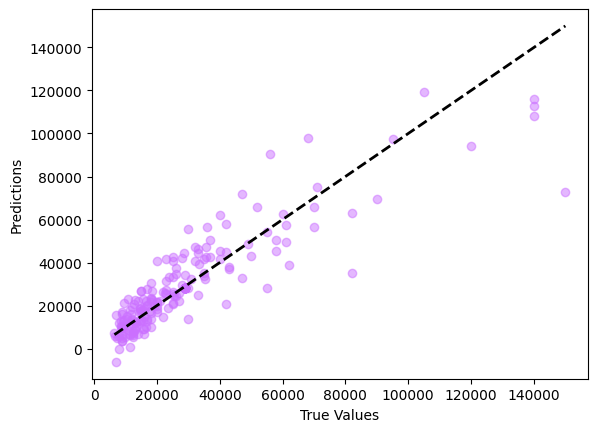

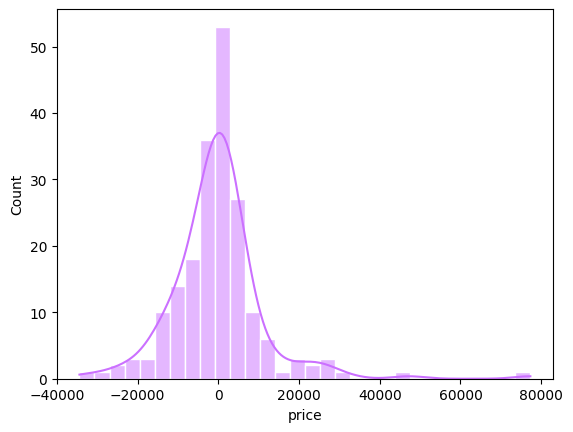

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Mean squared error (train): {mse_train:.2f}")
print(f"Mean squared error (test): {mse:.2f}")
print(f"R2 (train): {r2_train:.2f}")
print(f"R2 (test): {r2:.2f}")
linearity(model, X_test, y_test)
normality(model, X_test, y_test)

# Xarxes neuronals

In [177]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [104]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['R2Score']
  val_accuracy = history.history['val_R2Score']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training R2 Score')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation R2 Score')
  axes[1].set_title('Training and Validation R2 Score')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('R2 Score')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

## Primera iteració

c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


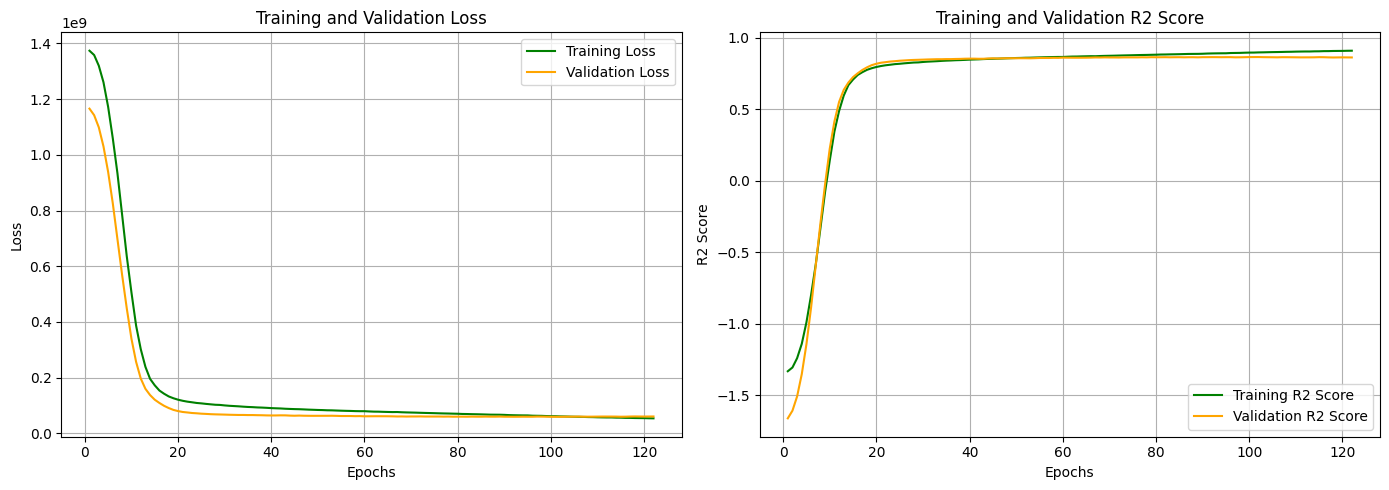

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


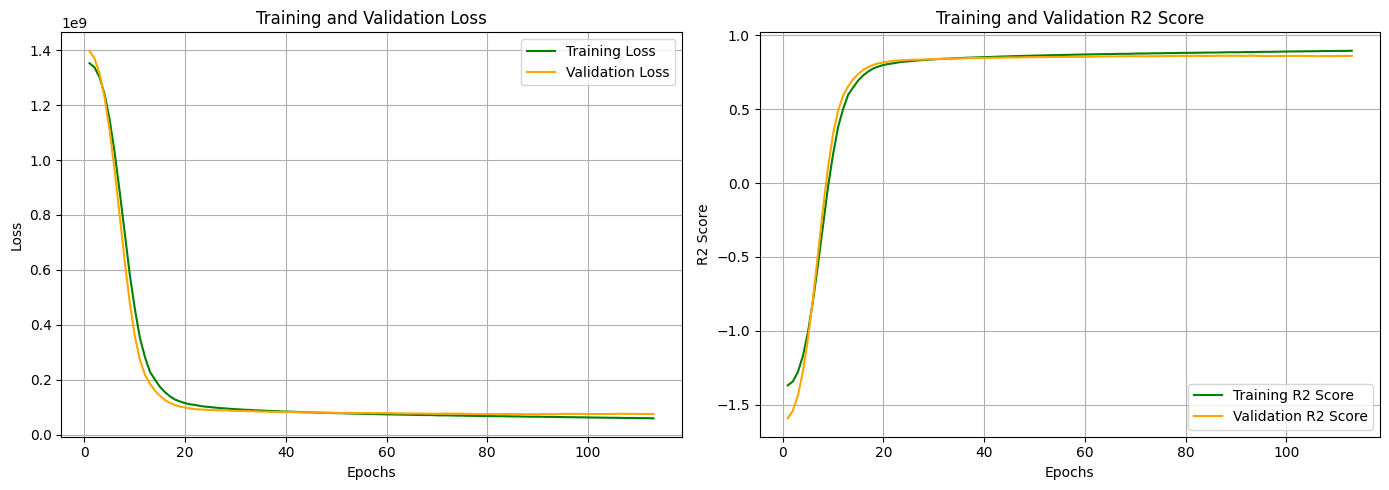

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


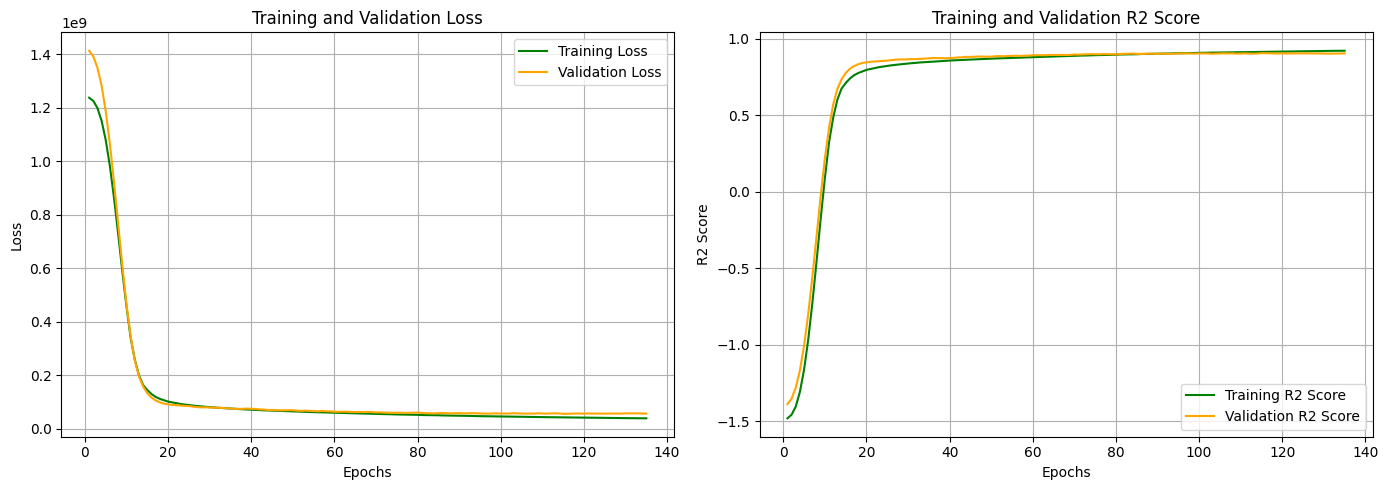

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


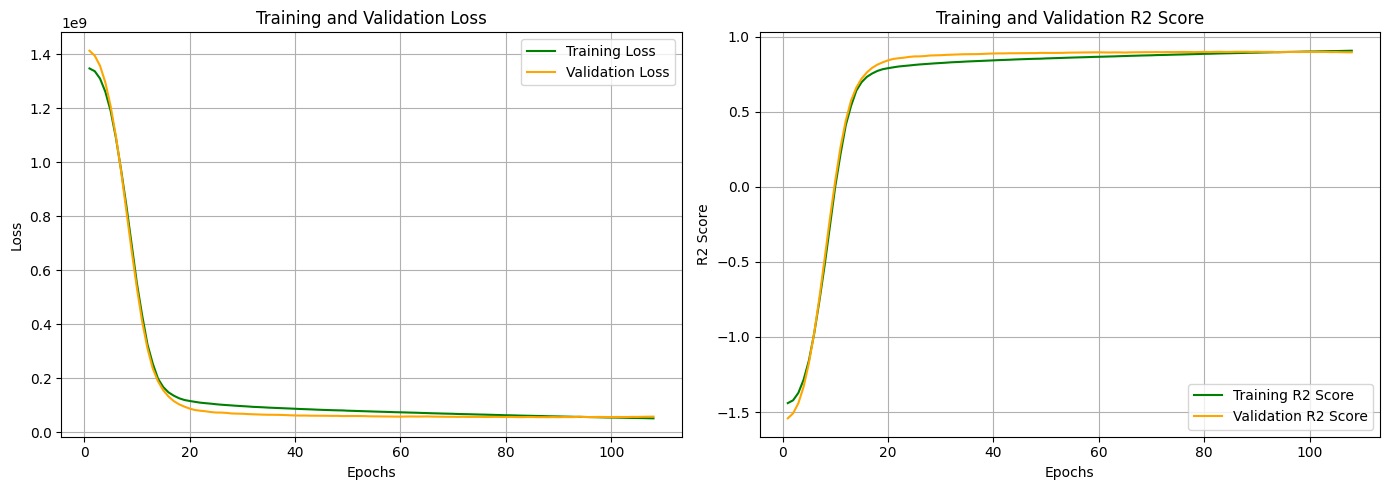

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


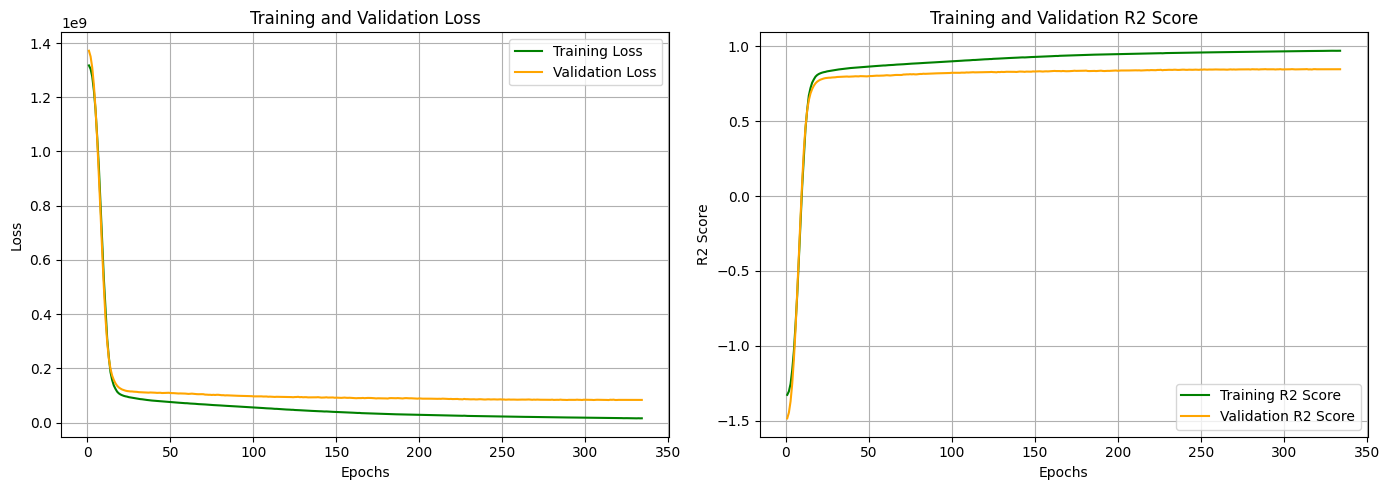

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
Training MSE: 52080750.0810
Validation MSE: 98334489.0495
Training R-squared: 0.9056
Validation R-squared: 0.8215


In [133]:
from sklearn.model_selection import KFold

num_folds = 5

train_mse_cv = []
val_mse_cv = []
train_r2_cv = []
val_r2_cv = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

learning_rate = 0.1

batch_size=64
num_epochs=1000

for train_index, test_index in kf.split(X_train):
    model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='linear') 
    ])

    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['R2Score'])

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv,y_val_cv= y_train.iloc[train_index],y_train.iloc[test_index]

    history = model.fit(X_train_cv, y_train_cv, epochs=num_epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=[early_stopping])

    plot_curves(history)

    y_train_pred = model.predict(X_train_cv)
    y_val_pred = model.predict(X_val_cv)

    train_mse_cv.append(mean_squared_error(y_train_cv, y_train_pred))
    val_mse_cv.append(mean_squared_error(y_val_cv, y_val_pred))

    train_r2_cv.append(r2_score(y_train_cv, y_train_pred))
    val_r2_cv.append(r2_score(y_val_cv, y_val_pred))


print('Training MSE: {:.4f}'.format(np.mean(train_mse_cv)))
print('Validation MSE: {:.4f}'.format(np.mean(val_mse_cv)))
print('Training R-squared: {:.4f}'.format(np.mean(train_r2_cv)))
print('Validation R-squared: {:.4f}'.format(np.mean(val_r2_cv)))

## Segona iteració

c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


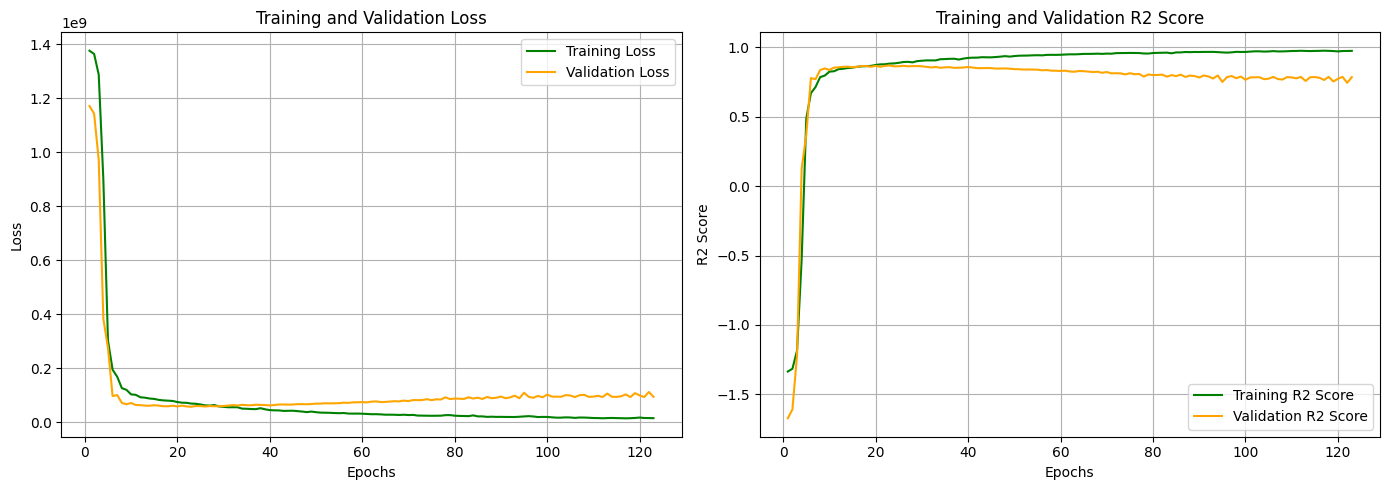

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


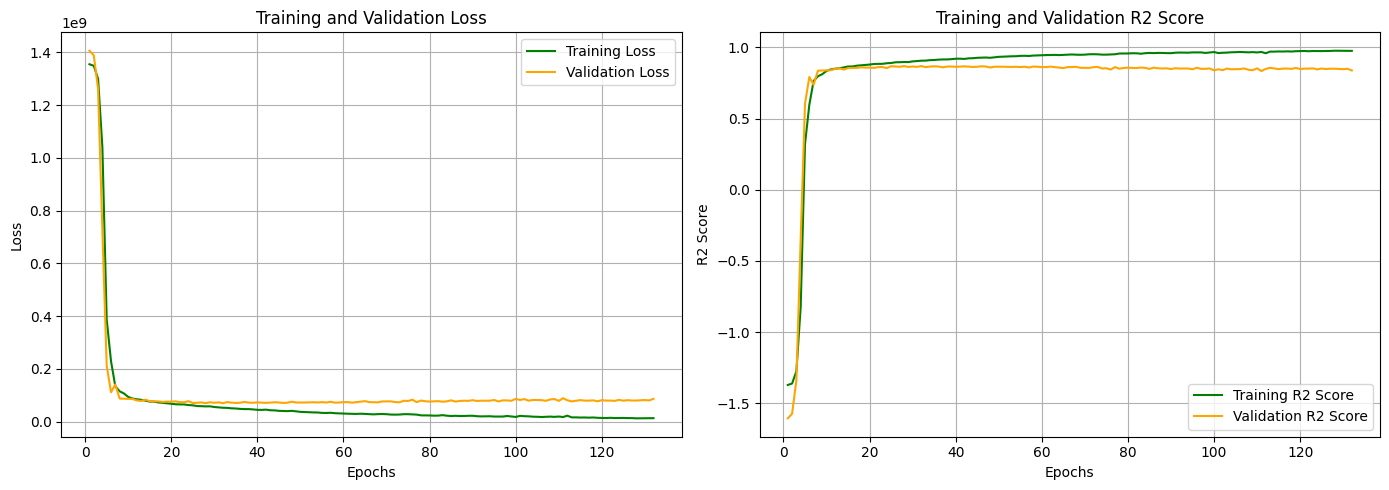

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


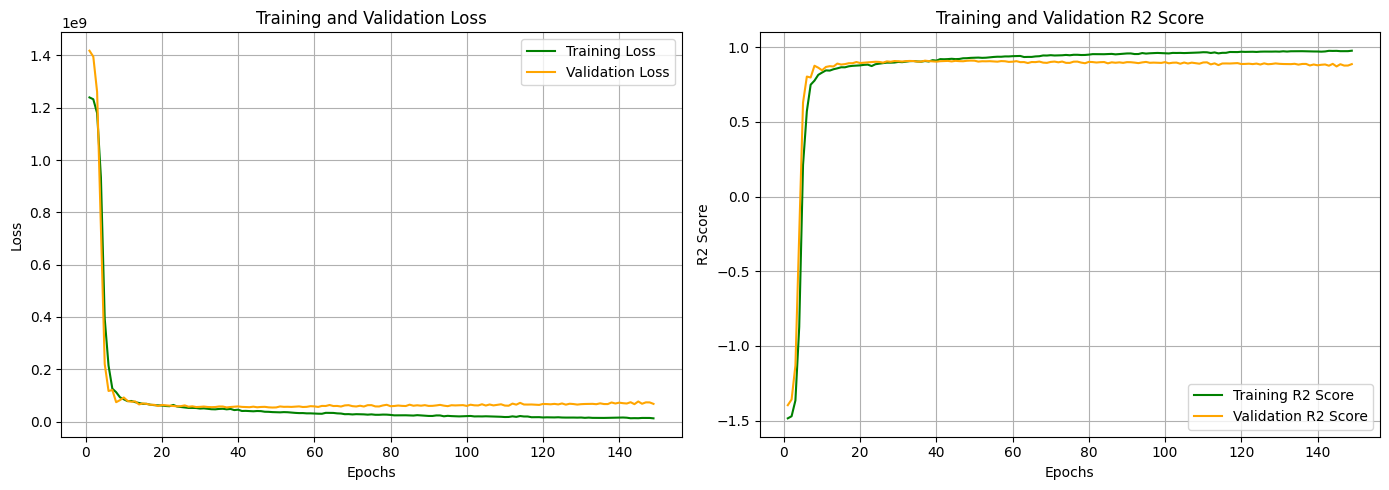

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


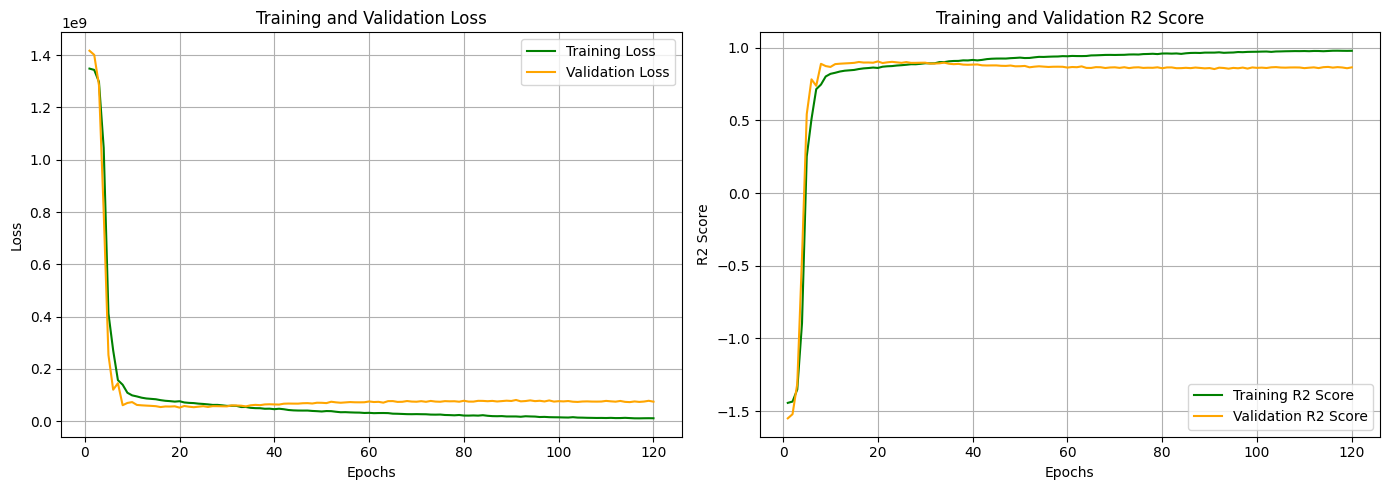

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


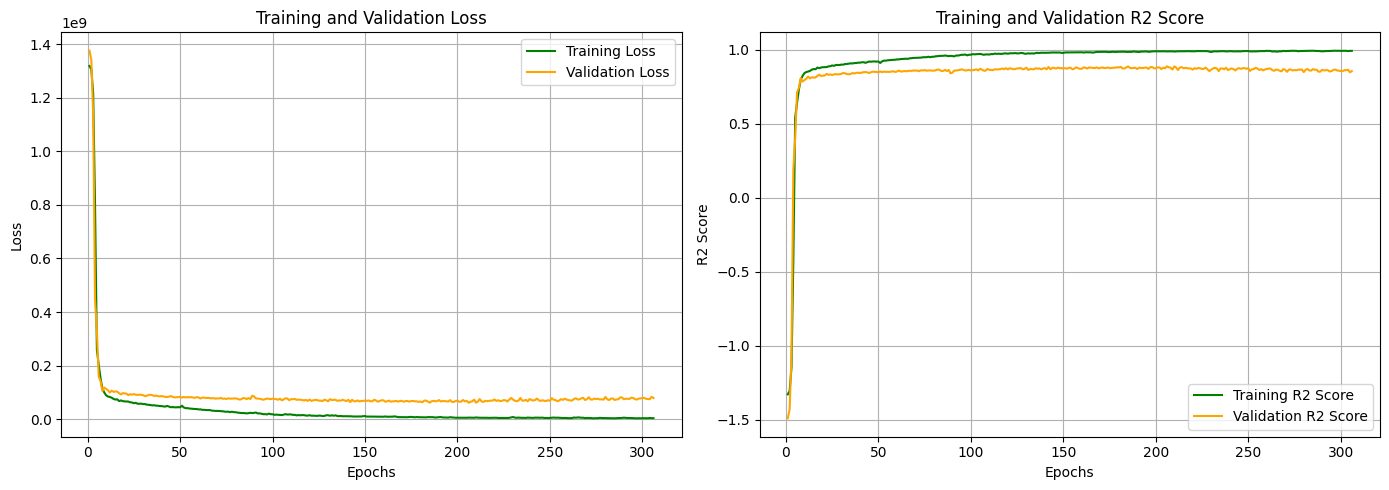

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training MSE: 48499410.6166
Validation MSE: 87477473.0357
Training R-squared: 0.9121
Validation R-squared: 0.8412


In [134]:
from sklearn.model_selection import KFold

num_folds = 5

train_mse_cv = []
val_mse_cv = []
train_r2_cv = []
val_r2_cv = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

learning_rate = 0.01

batch_size=64
num_epochs=2000

for train_index, test_index in kf.split(X_train):
    model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') 
    ])

    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['R2Score'])

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv,y_val_cv= y_train.iloc[train_index],y_train.iloc[test_index]

    history = model.fit(X_train_cv, y_train_cv, epochs=num_epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=[early_stopping])

    plot_curves(history)

    y_train_pred = model.predict(X_train_cv)
    y_val_pred = model.predict(X_val_cv)

    train_mse_cv.append(mean_squared_error(y_train_cv, y_train_pred))
    val_mse_cv.append(mean_squared_error(y_val_cv, y_val_pred))

    train_r2_cv.append(r2_score(y_train_cv, y_train_pred))
    val_r2_cv.append(r2_score(y_val_cv, y_val_pred))


print('Training MSE: {:.4f}'.format(np.mean(train_mse_cv)))
print('Validation MSE: {:.4f}'.format(np.mean(val_mse_cv)))
print('Training R-squared: {:.4f}'.format(np.mean(train_r2_cv)))
print('Validation R-squared: {:.4f}'.format(np.mean(val_r2_cv)))

## Tercera iteració

c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


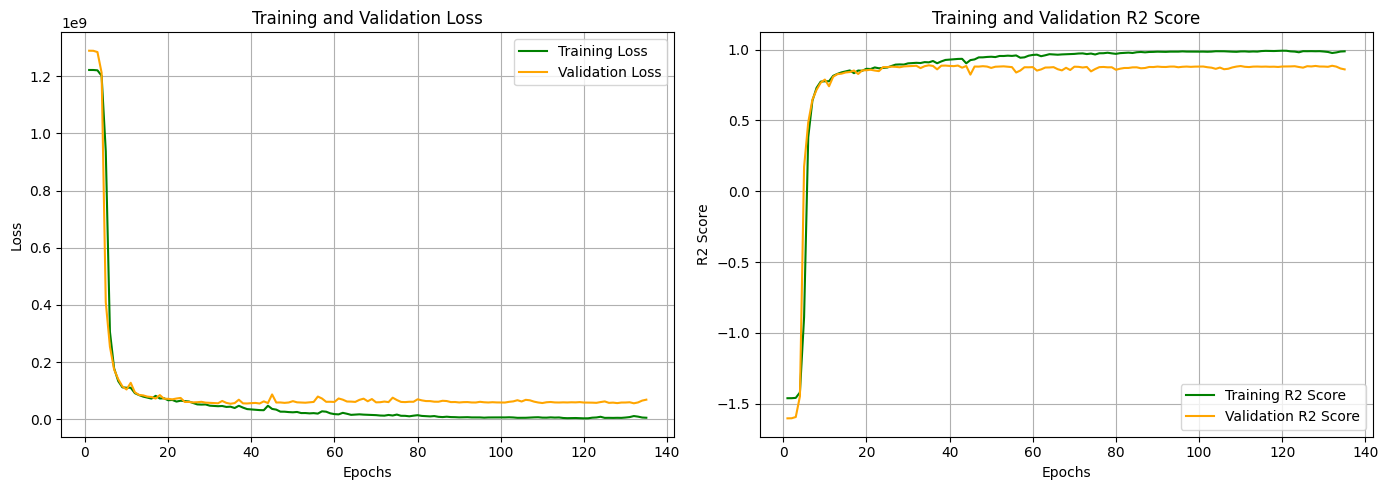

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


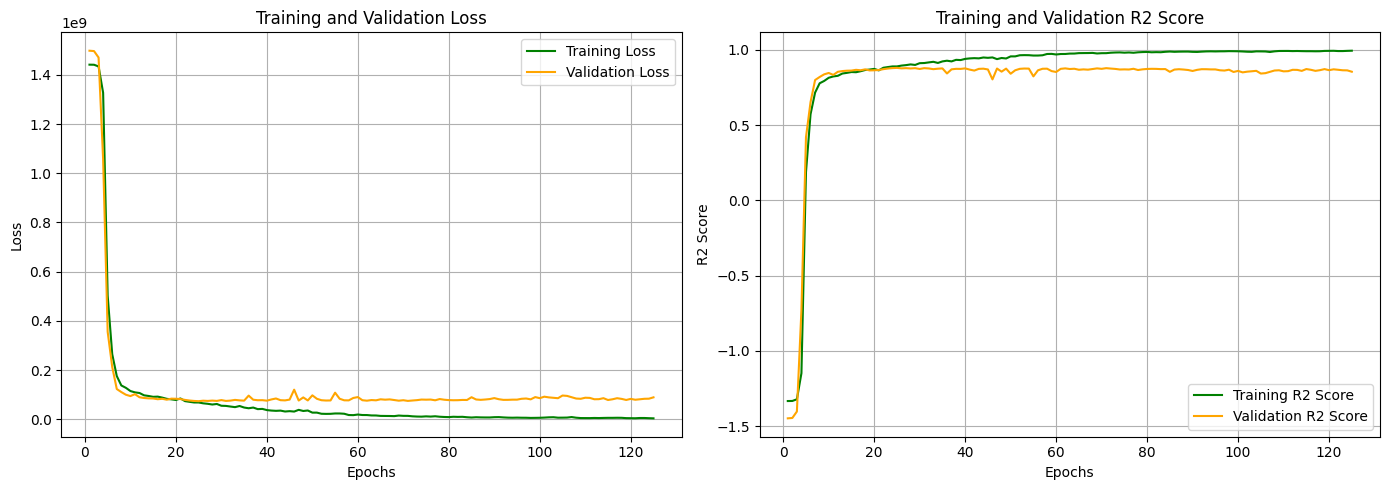

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


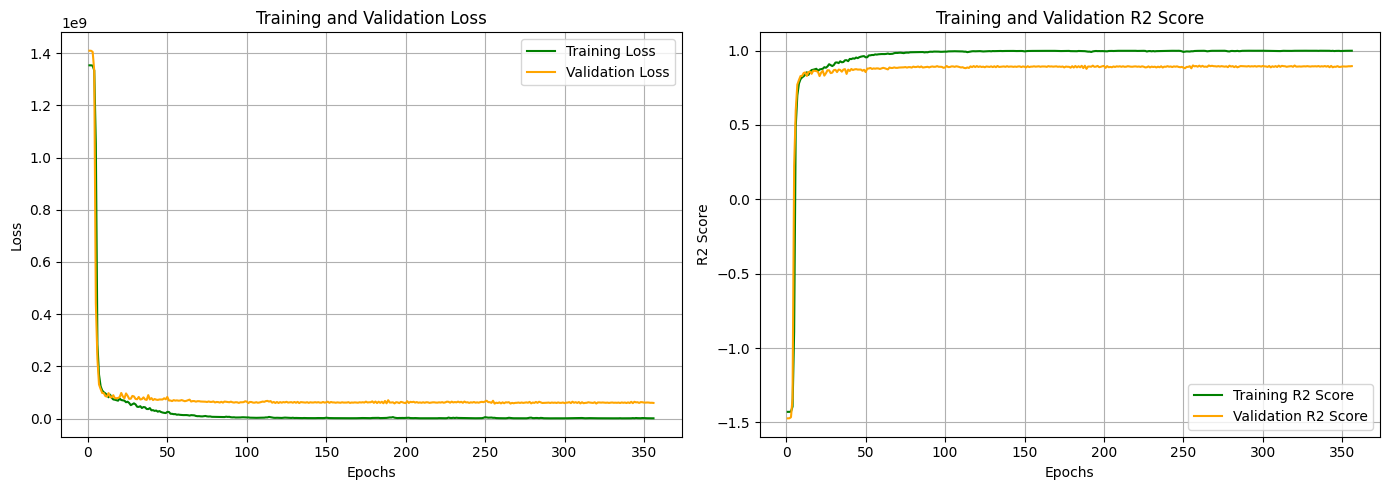

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


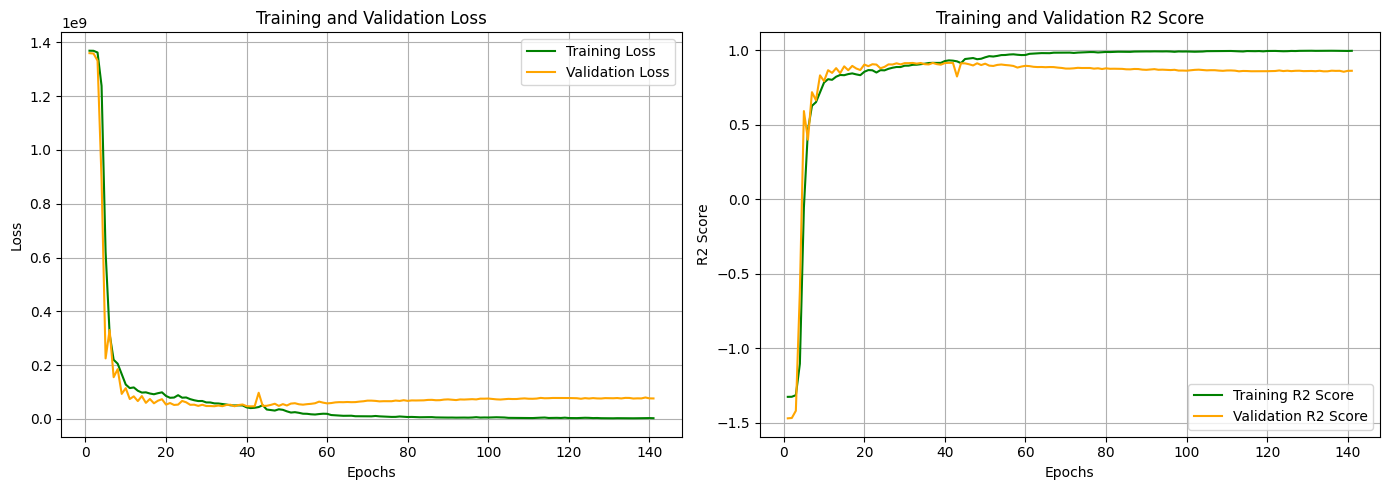

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


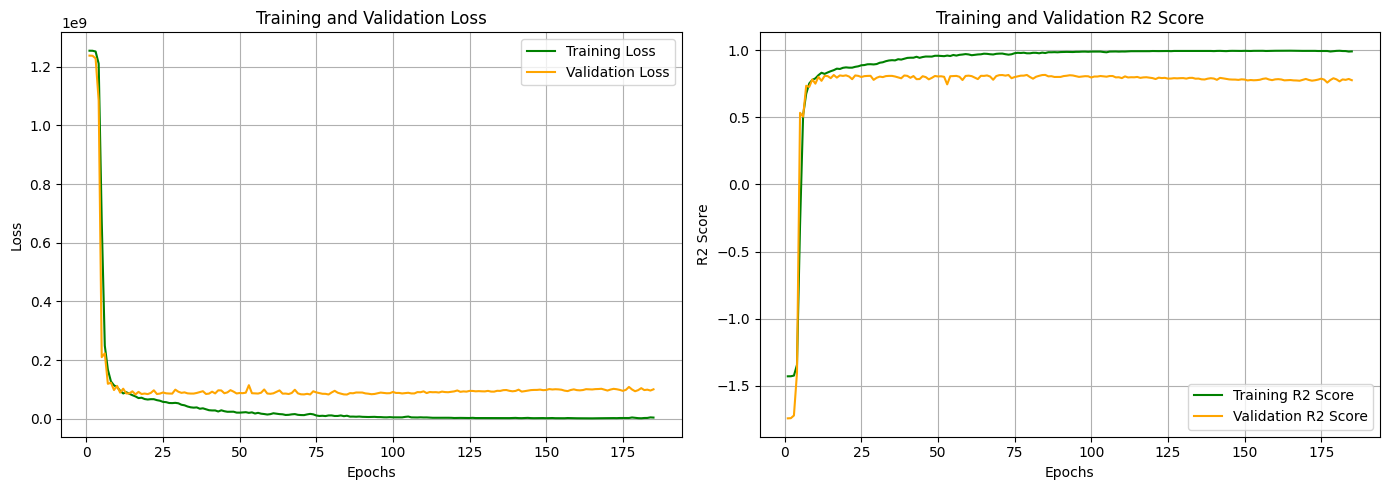

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training MSE: 37158686.4310
Validation MSE: 82148155.1503
Training R-squared: 0.9334
Validation R-squared: 0.8415


In [137]:
from sklearn.model_selection import KFold

num_folds = 5

train_mse_cv = []
val_mse_cv = []
train_r2_cv = []
val_r2_cv = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=64)

learning_rate = 0.001

batch_size=64
num_epochs=2000

for train_index, test_index in kf.split(X_train):
    model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(1, activation='linear') 
    ])

    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
    
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['R2Score'])

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv,y_val_cv= y_train.iloc[train_index],y_train.iloc[test_index]

    history = model.fit(X_train_cv, y_train_cv, epochs=num_epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=[early_stopping])

    plot_curves(history)

    y_train_pred = model.predict(X_train_cv)
    y_val_pred = model.predict(X_val_cv)

    train_mse_cv.append(mean_squared_error(y_train_cv, y_train_pred))
    val_mse_cv.append(mean_squared_error(y_val_cv, y_val_pred))

    train_r2_cv.append(r2_score(y_train_cv, y_train_pred))
    val_r2_cv.append(r2_score(y_val_cv, y_val_pred))


print('Training MSE: {:.4f}'.format(np.mean(train_mse_cv)))
print('Validation MSE: {:.4f}'.format(np.mean(val_mse_cv)))
print('Training R-squared: {:.4f}'.format(np.mean(train_r2_cv)))
print('Validation R-squared: {:.4f}'.format(np.mean(val_r2_cv)))

## Quarta iteració

c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


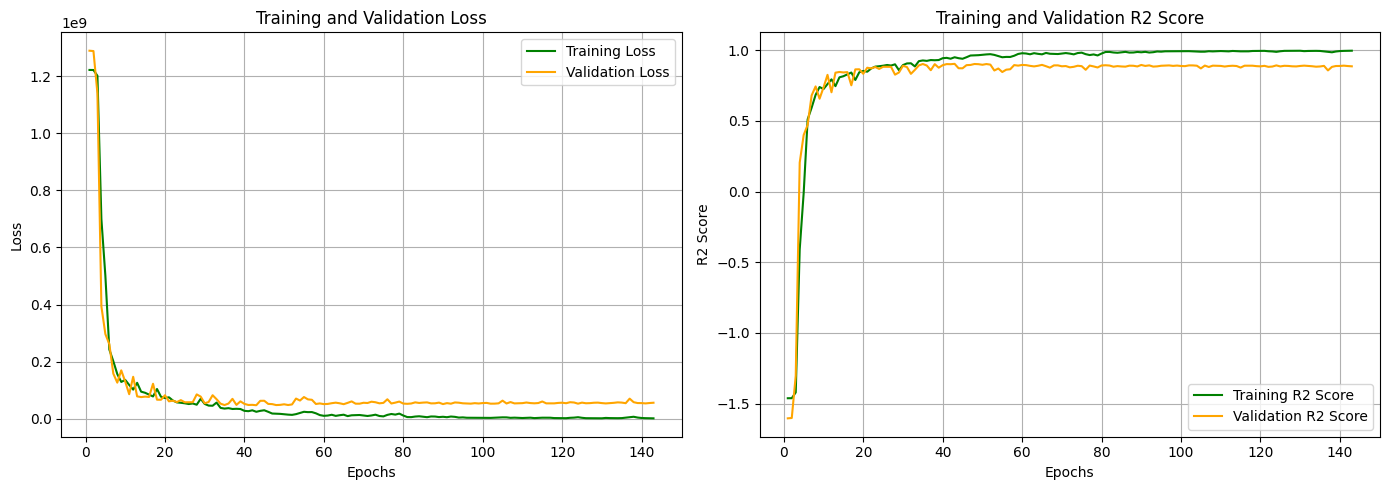

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


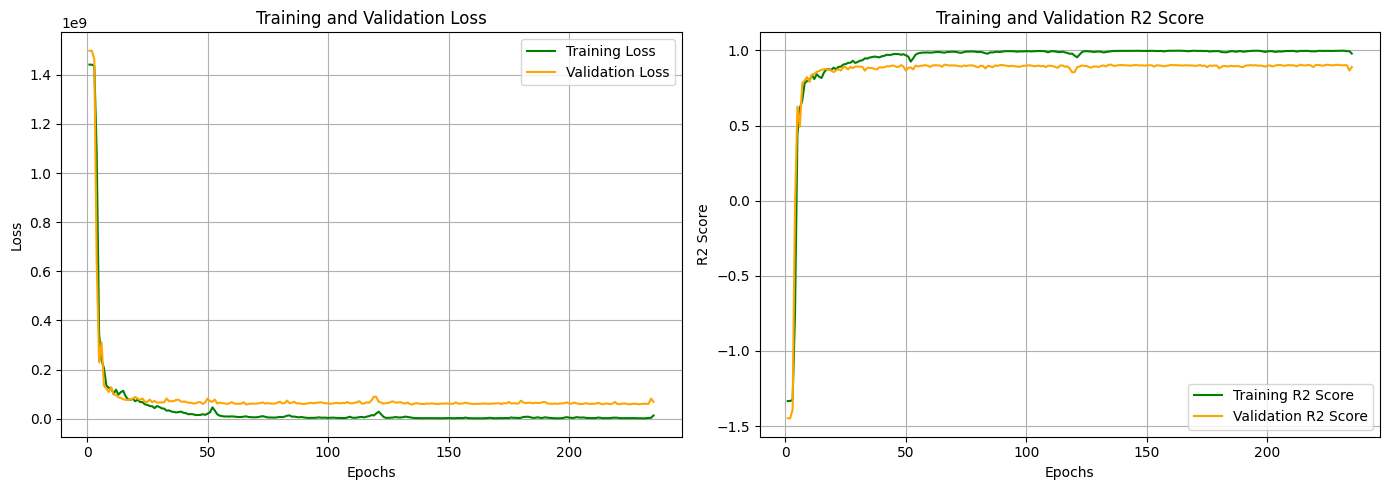

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


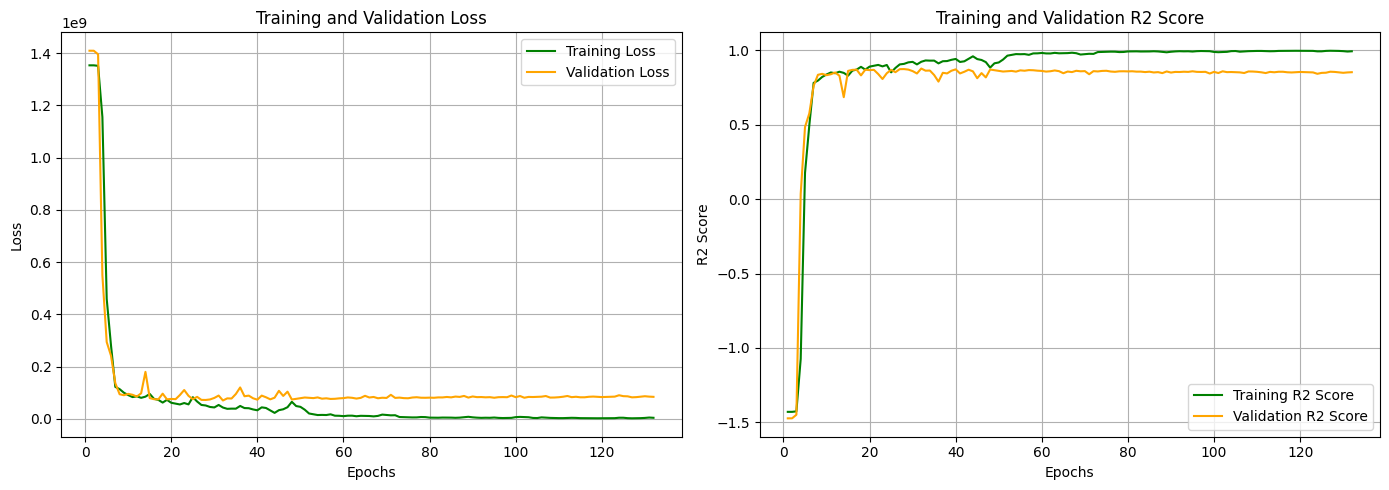

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


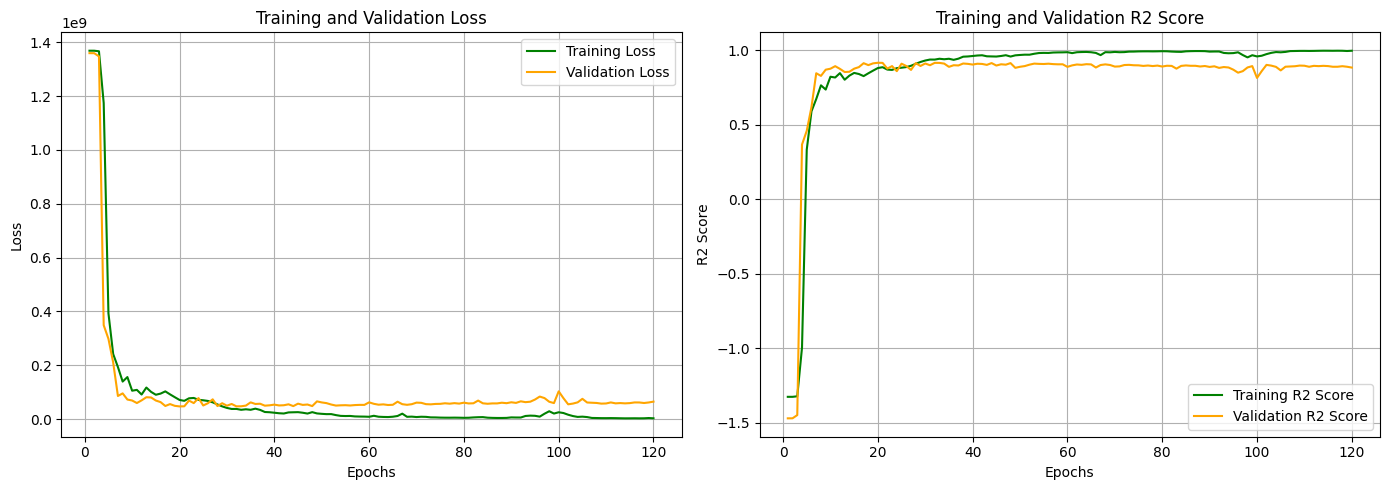

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


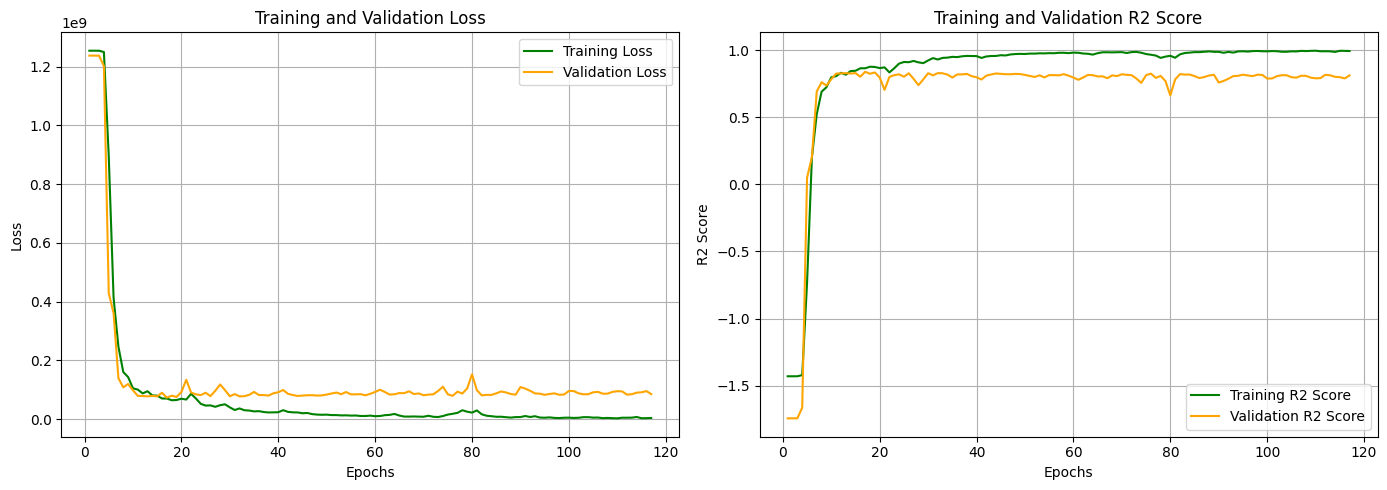

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training MSE: 42094484.7550
Validation MSE: 87685566.1737
Training R-squared: 0.9222
Validation R-squared: 0.8280


In [140]:
from sklearn.model_selection import KFold

num_folds = 5

train_mse_cv = []
val_mse_cv = []
train_r2_cv = []
val_r2_cv = []

kf = KFold(n_splits=num_folds, shuffle=True, random_state=64)

learning_rate = 0.001

batch_size=64
num_epochs=2000

for train_index, test_index in kf.split(X_train):
    model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(1, activation='linear') 
    ])

    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
    
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['R2Score'])

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv,y_val_cv= y_train.iloc[train_index],y_train.iloc[test_index]

    history = model.fit(X_train_cv, y_train_cv, epochs=num_epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=[early_stopping])

    plot_curves(history)

    y_train_pred = model.predict(X_train_cv)
    y_val_pred = model.predict(X_val_cv)

    train_mse_cv.append(mean_squared_error(y_train_cv, y_train_pred))
    val_mse_cv.append(mean_squared_error(y_val_cv, y_val_pred))

    train_r2_cv.append(r2_score(y_train_cv, y_train_pred))
    val_r2_cv.append(r2_score(y_val_cv, y_val_pred))


print('Training MSE: {:.4f}'.format(np.mean(train_mse_cv)))
print('Validation MSE: {:.4f}'.format(np.mean(val_mse_cv)))
print('Training R-squared: {:.4f}'.format(np.mean(train_r2_cv)))
print('Validation R-squared: {:.4f}'.format(np.mean(val_r2_cv)))

## Test del model final (iteració 3)

c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


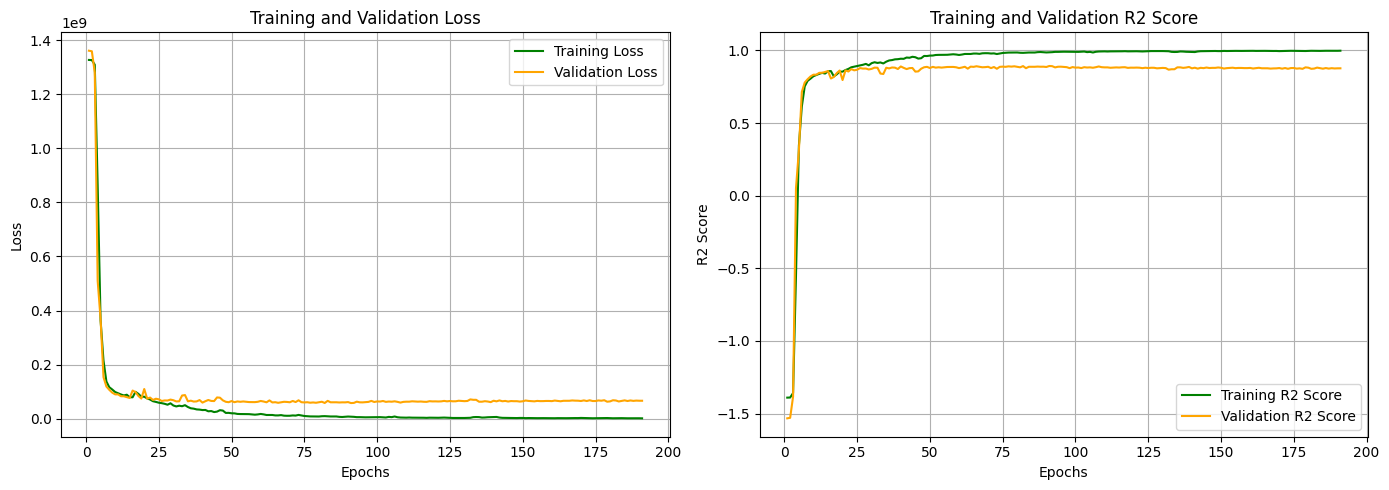

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


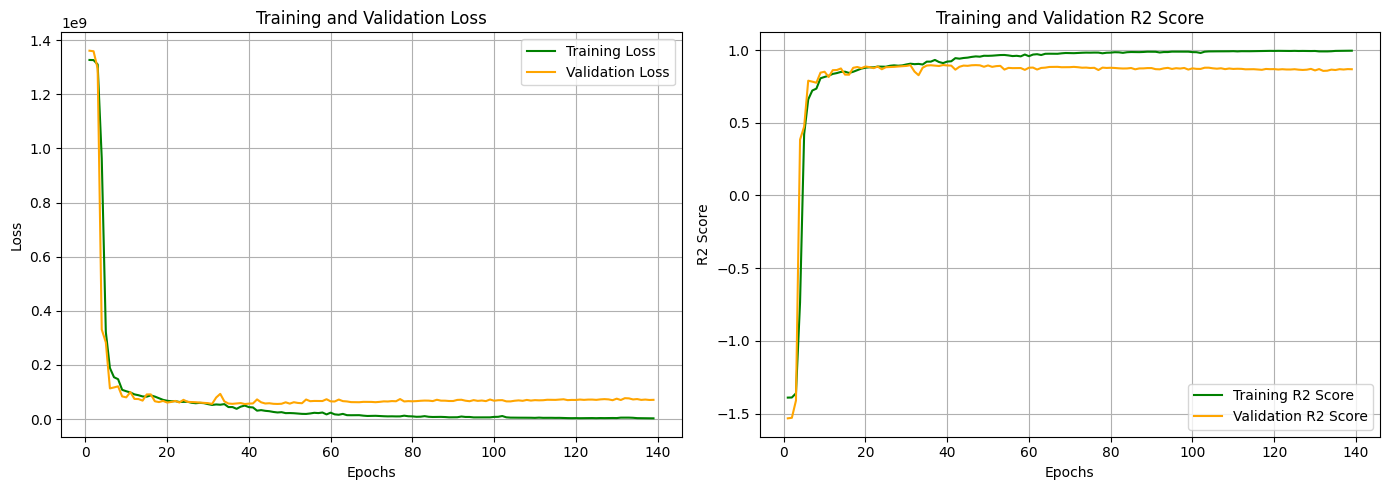

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


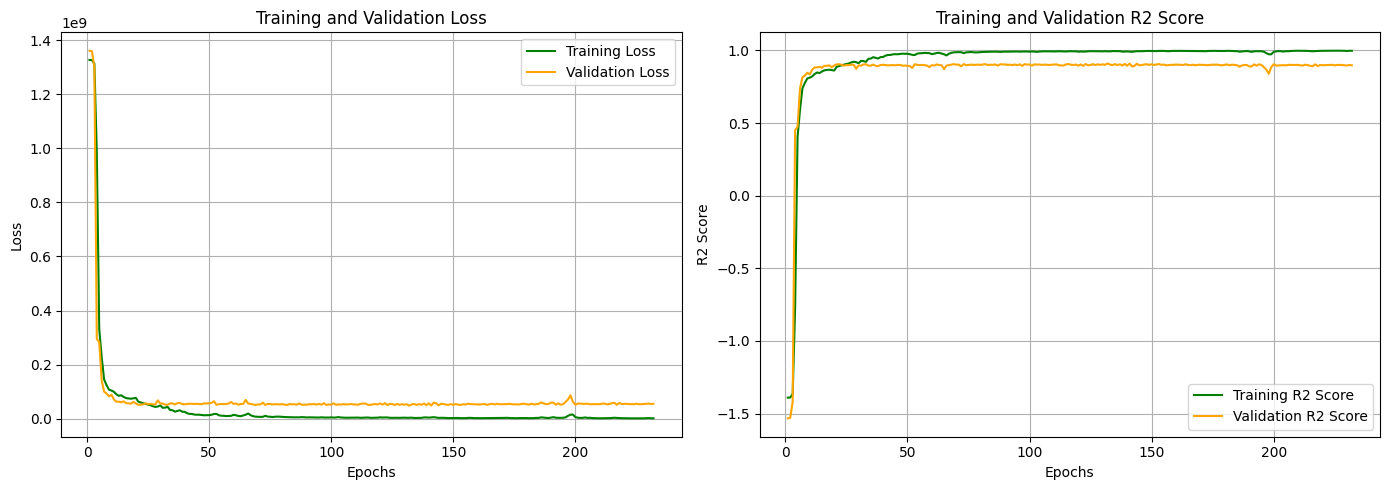

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


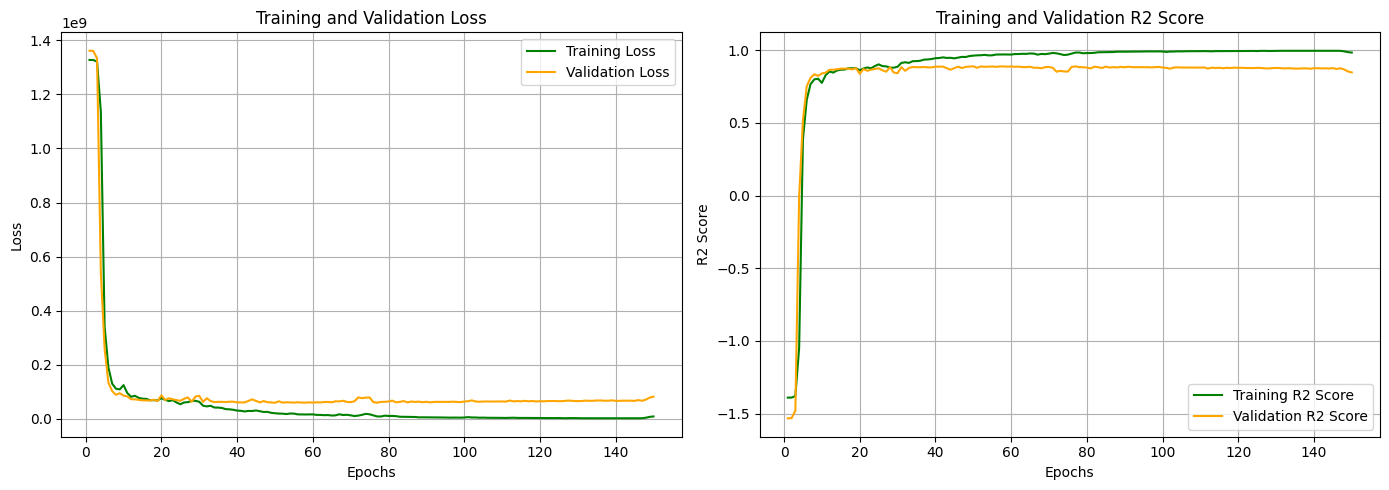

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


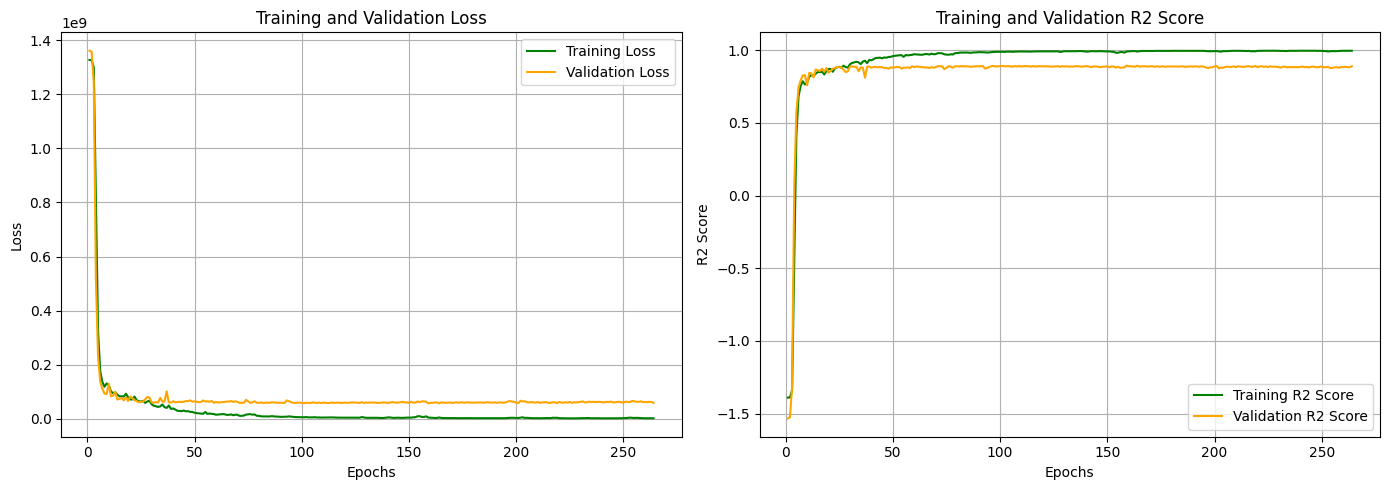

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


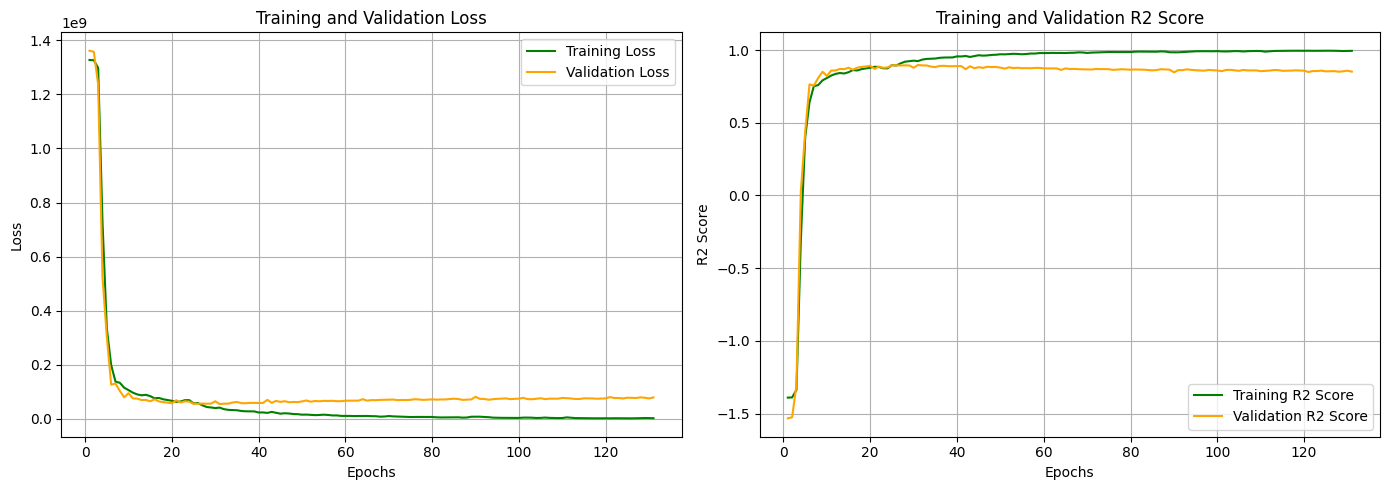

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


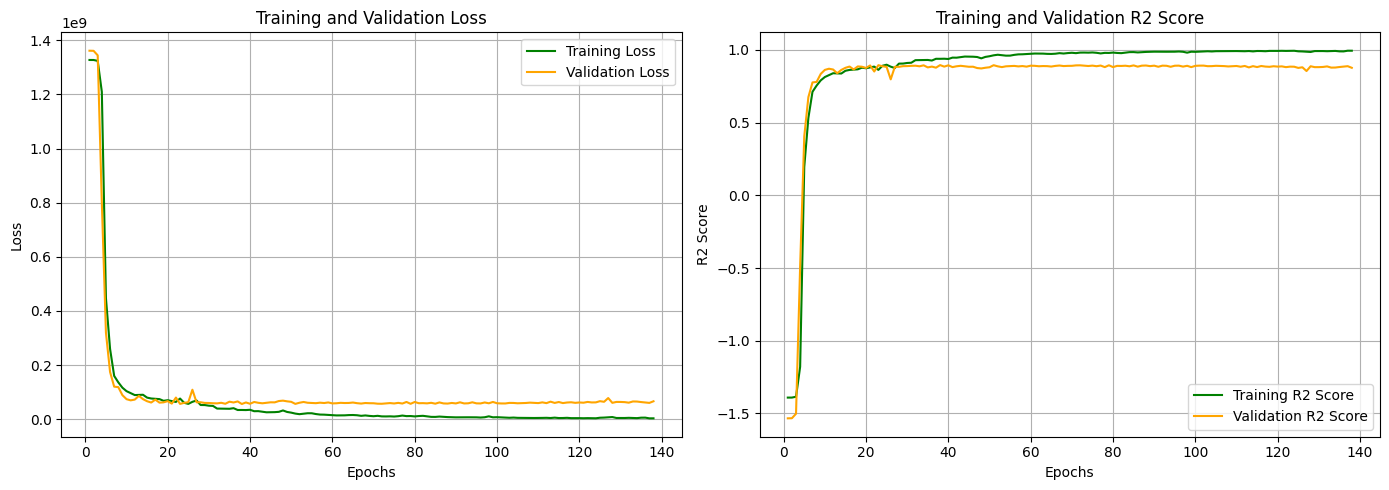

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


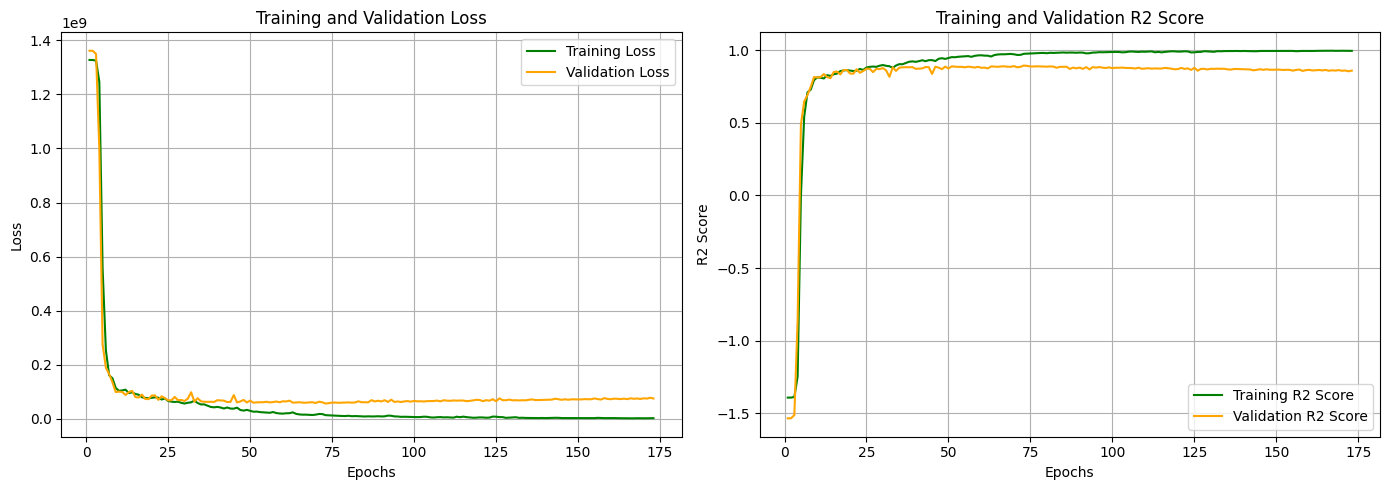

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


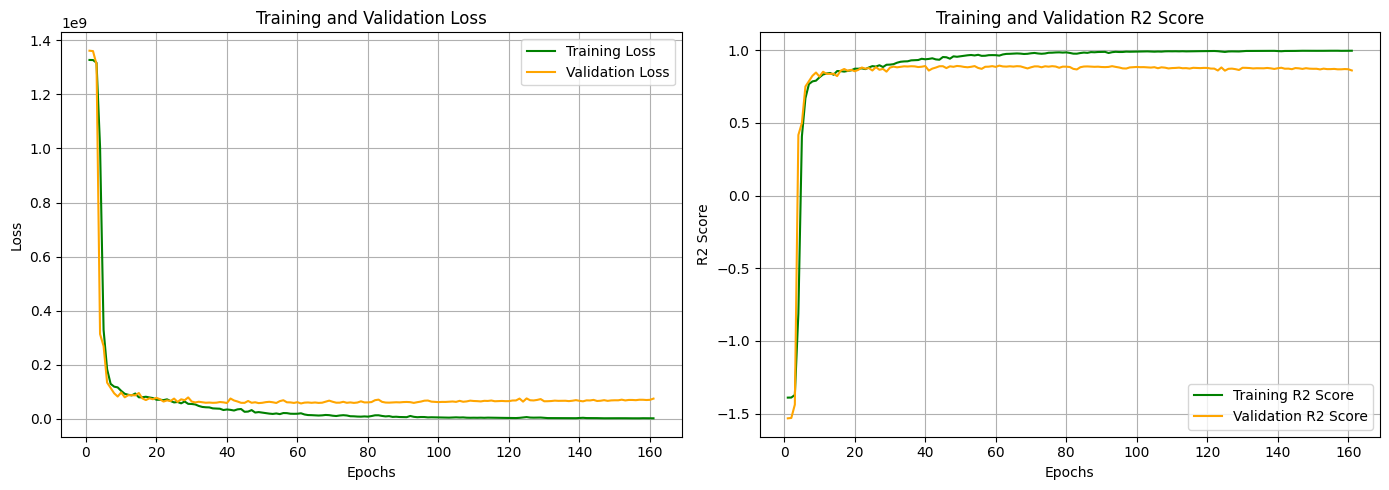

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


c:\Users\maxmg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


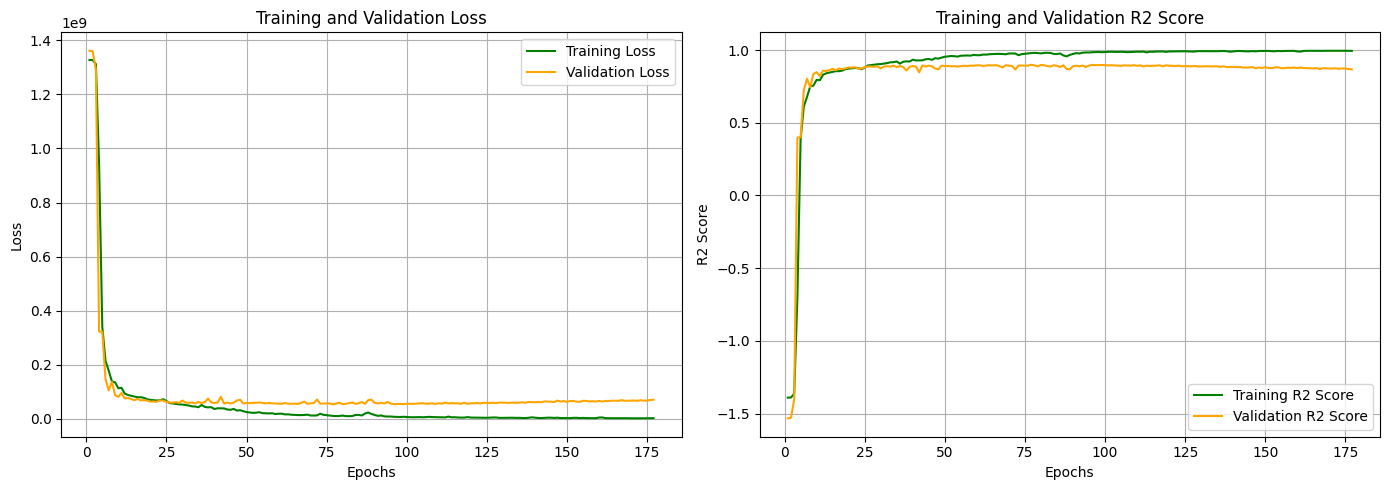

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
Average Training MSE: 24358227.9482
Average Testing MSE: 87423690.1173
Average Training R-squared: 0.9559
Average Testing R-squared: 0.8603
Minimum Testing R-squared: 0.8177
Maximum Testing R-squared: 0.8845


In [ ]:
learning_rate = 0.001

train_mse_total = []
test_mse_total = []

train_r2_total = []
test_r2_total = []

batch_size=64
num_epochs=2000

for i in range(10):
    model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(1, activation='linear') 
    ])

    early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['R2Score'])

    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split = 0.2, verbose=0, callbacks=[early_stopping])

    plot_curves(history)

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)

    train_mse_total.append(train_mse)
    test_mse_total.append(test_mse)

    train_r2_total.append(train_r2)
    test_r2_total.append(test_r2)

print('Average Training MSE: {:.4f}'.format(np.mean(train_mse_total)))
print('Average Testing MSE: {:.4f}'.format(np.mean(test_mse_total)))
print('Average Training R-squared: {:.4f}'.format(np.mean(train_r2_total)))
print('Average Testing R-squared: {:.4f}'.format(np.mean(test_r2_total)))
print('Minimum Testing R-squared: {:.4f}'.format(np.min(test_r2_total)))
print('Maximum Testing R-squared: {:.4f}'.format(np.max(test_r2_total)))